In [1]:
import matplotlib.pyplot as plt

In [2]:
from src.args import args
from src.utils import get_fixed_hyper_param, get_device, game_data_loaders, load_model, extract_features, torch2numpy

In [3]:
from src.features_extraction import VanillaVAE, VanillaVAELossFunction
from src.features_extraction import BetaVAE, BetaVAELossFunction
from src.features_extraction import WassersteinAE, WassersteinAELossFunction

In [4]:
device = get_device()
batch_size, num_of_channels, input_size, z_dim = get_fixed_hyper_param(args['hyper_parameters'])
reg_weight = args['wasserstein_ae']['reg_weight']

In [5]:
model = VanillaVAE(z_dim, num_of_channels, input_size).to(device)
loss = VanillaVAELossFunction()

#### Choose the AE that u r going to use

In [6]:
#model = VanillaVAE(z_dim, num_of_channels, input_size).to(device)
#loss = VanillaVAELossFunction()

#model = WassersteinAE(z_dim, num_of_channels, input_size).to(device)
#loss = WassersteinAELossFunction(reg_weight)

#model = BetaVAE(z_dim, num_of_channels, input_size).to(device)
#loss = BetaVAELossFunction()

In [7]:
dataloaders = game_data_loaders()
train_loaders, val_loaders = dataloaders['train'], dataloaders['val']

In [8]:
model = load_model(model)

In [9]:
X = next(iter(dataloaders['val']))

In [10]:
Z = extract_features(model, X, device)

In [11]:
X_reco, *_ = model(X.to(device))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-2.96725214e-01  3.36941630e-01  4.27830398e-01 -1.75026417e-01
 -1.90610796e-01 -2.30596215e-03 -1.51695460e-01  1.94305345e-01
  4.79689658e-01  1.11341059e-01  4.86875772e-02  2.78612912e-01
 -5.92055440e-01 -7.65811086e-01  9.93021309e-01  8.57936889e-02
  5.26200116e-01  1.48371148e+00 -3.55941243e-02 -6.29331946e-01
 -4.22752827e-01  4.33835834e-02 -2.23954841e-02 -3.83376688e-01
  6.21108711e-01  5.90609133e-01  4.26465422e-01  1.30695492e-01
  1.18931696e-01 -3.35007071e-01  5.45174360e-01 -5.75307846e-01
  3.94378990e-01 -2.38786668e-01  3.64724308e-01  7.07436442e-01
 -3.62496018e-01 -5.95964678e-02  1.87446654e-01 -1.59166193e+00
  3.50148261e-01 -1.74365833e-01  5.04252493e-01  6.02438927e-01
 -3.33600581e-01  6.81792259e-01  6.97645023e-02 -1.21057975e+00
  9.03463840e-01 -3.52675676e-01  9.14608896e-01  2.50572473e-01
 -2.64158875e-01 -2.68702269e-01 -2.85903901e-01  2.35313177e+00
 -1.63811237e-01  5.04814424e-02  1.40873685e-01 -3.39125603e-01
  1.10722676e-01  4.70393

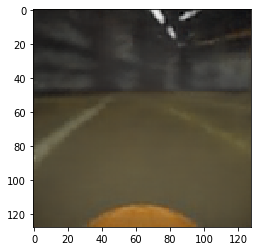

[-0.2373702   0.63032305 -0.1576716   0.47534794 -0.08828859 -0.03594639
 -0.14563939 -0.12294353 -0.6411302  -0.02719606  0.307765   -0.05020793
 -0.20962718 -0.23790108  1.3341067   0.04809382  0.5795446   0.61113
 -0.01811311 -0.39907938 -0.35057792  0.36222225 -0.4947674  -0.06920823
  0.48954815  0.62649864  1.1032656  -0.11292483 -0.2911131   0.19745122
 -0.6014959  -1.0712061   0.6138892  -0.12741983 -0.5002905  -0.18389893
 -0.3210247  -0.04550819  0.7213646  -0.86648995 -0.5283325  -0.42849606
 -0.09183718  0.23287511  0.0630922   1.0348212  -0.24651301 -1.4319501
  0.44146895  0.3520252   0.47014225 -0.08452284  0.08461937 -0.46884042
 -0.04415755  1.6052376  -0.74382347 -0.1915206   0.36744595 -0.23195116
  0.55318946  0.18783015 -0.10560459  1.0766382 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


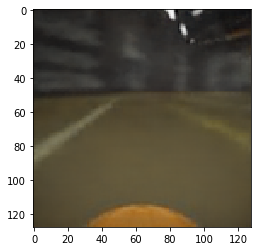

[-2.58865535e-01  1.13803792e+00 -1.99990317e-01 -3.65027398e-01
 -2.53446192e-01  6.56004399e-02 -2.21925154e-01 -1.00972094e-02
  3.78865600e-01 -3.34489495e-01 -1.51555032e-01 -1.21837236e-01
  1.94174379e-01  4.04611051e-01 -3.48791987e-01  3.62017378e-02
  1.04582667e+00  1.03189170e-01 -2.62702070e-03  8.63315910e-02
 -1.37136996e-01  4.70494956e-01 -2.00192541e-01 -2.64077872e-01
  2.89160430e-01 -3.78585577e-01  6.47756696e-01  3.23379219e-01
 -5.01587152e-01 -2.00563297e-01  6.34571731e-01  6.81190342e-02
  4.48132873e-01 -1.62480548e-02 -1.42324967e-02 -1.05810630e+00
  5.29909544e-02  1.60181791e-01  1.69420332e-01 -6.26397550e-01
  2.89682567e-01 -6.01996958e-01  1.36393532e-01 -5.30632734e-02
  3.27514648e-01 -5.31847365e-02 -1.17186703e-01 -1.14974535e+00
  6.29621029e-01 -2.69786149e-01  6.05233982e-02  8.18315893e-04
  2.99468040e-01  9.97395664e-02 -7.57999539e-01  3.82585406e-01
 -7.79459894e-01 -5.92583776e-01  9.08368528e-02 -3.70453537e-01
 -4.75426018e-01  3.53512

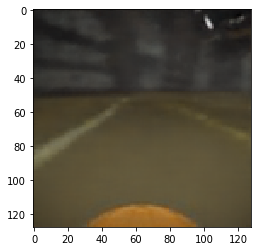

[-0.01062012  1.0758758  -0.2258414  -0.37265542 -0.48086792 -0.20234805
 -0.30997983 -0.15309618  0.12388526 -0.4046596  -0.04028365  0.21674597
 -0.00326514  0.5680908  -0.40423816 -0.05479223  1.0962174   0.24781077
 -0.4953831   0.06796362 -0.1536199   0.54515165  0.2907518  -0.32730347
  0.26790273 -0.31995726  0.44143838 -0.40530425  0.32775247 -0.14198726
 -0.31376594  0.05939211  0.52962315 -0.10734206 -0.05246902 -1.025668
  0.05436783  0.304747    0.08560762 -0.5734826   0.35093197 -0.52087784
  0.22948833 -0.05836102  0.36797646  0.00567723  0.08895062 -1.0176713
  0.5743144   0.25811052 -0.1179343   0.09485458  0.21364677 -0.20354226
 -0.684408    0.2673924  -0.81731707 -0.66205186  0.1629566  -0.44653895
 -0.14053956  0.4287339   0.28281128 -0.3793691 ]


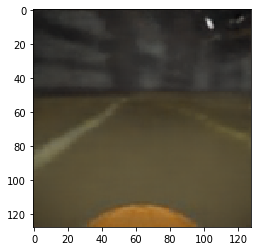

[-3.36938441e-01  9.77274537e-01 -3.03489864e-01 -1.70964256e-01
 -5.32691300e-01 -3.42373513e-02 -2.97202259e-01  2.08921731e-02
 -2.26960003e-01 -2.72679627e-01  1.57474518e-01 -9.30753648e-02
  1.01994969e-01  4.51413304e-01 -1.72566280e-01 -9.73284543e-02
  1.02395189e+00  3.23300749e-01 -4.88106072e-01 -1.66161671e-01
 -2.63086110e-01  5.87476194e-01 -7.56458819e-01 -2.29939833e-01
  3.02576035e-01 -1.06449239e-01  3.36095899e-01 -1.72089279e-01
  7.62530491e-02 -6.76125139e-02 -1.35076374e-01 -2.65243948e-01
  3.96165311e-01 -3.01185623e-03 -1.97203904e-01 -1.03606558e+00
 -1.15311734e-01  3.46429646e-01  1.08960345e-01 -6.83215618e-01
  4.17043298e-01 -4.98538554e-01  2.76879936e-01 -4.04177159e-02
  2.80239761e-01  1.83883429e-01 -4.77918118e-01 -1.16243792e+00
  4.47432160e-01 -6.68991923e-01 -1.29500404e-04  4.22976948e-02
  7.85571784e-02 -1.14931382e-01 -5.43258607e-01  1.77275479e-01
 -8.49717379e-01 -6.34659827e-01  2.59128600e-01 -2.79240698e-01
 -2.79420186e-02  4.64280

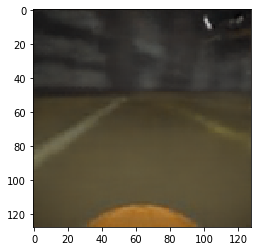

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.28751707  0.9065764  -0.42253277 -0.10355727 -0.5963463  -0.509136
 -0.30855015 -0.34870404 -0.55512494 -0.39837003  0.2987178  -0.03625006
 -0.07079133  0.12829375 -0.05941015 -0.04988616  0.8769546   0.3985138
 -0.60867965 -0.07370679 -0.40172052  0.69240737 -0.31360477 -0.14918393
  0.28970426 -0.0596652   0.1912779   0.6173047  -0.05869012 -0.09282894
  0.19351238 -0.49931058  0.37926984 -0.08326472 -0.14091796 -1.014395
 -0.27702197  0.4138493   0.38474885 -0.8008609   0.40754026 -0.55195385
  0.44432157 -0.13176616  0.1343843   0.14202689 -0.1621106  -1.3017452
  0.52314454 -0.20411874  0.00559331 -0.2669019   0.15029606 -0.19930801
 -0.51849854  0.30751002 -1.0386792  -0.5289109   0.35431892 -0.32449955
 -0.09145791  0.374177   -0.8599386  -0.39004162]


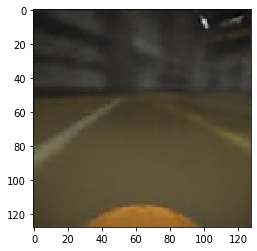

[ 0.5520022  -0.3031176  -0.14711614  0.26586676  0.7766932   0.05087507
  0.08526427 -0.48417982 -0.38976502  0.54086345 -0.34356377  0.3807998
  0.26314378 -0.9613965  -0.25998193  0.00814441 -0.93644017 -2.2311683
  0.09717891 -0.29104587 -0.21871422 -0.7774635   0.06756708  0.01348587
  0.16496831  0.7909569   1.4338431   0.16709265 -0.6562448   0.48399106
 -0.02472783  0.07103802  0.46652904 -0.29971063  0.4518348   0.292419
  0.09617575  0.04835229 -0.3495145  -0.42595956 -1.1846887  -0.90844893
  0.14051177  0.0295645  -1.065883    0.11474653 -0.13230145 -0.7108384
 -0.06747229 -0.35355797  0.6947969   0.43199214 -0.27318478  0.38872963
  0.2735823   1.9405106   0.8394319   0.820482   -0.14372519 -0.10528997
  0.08603875 -0.49219692 -0.17167202  1.2846589 ]


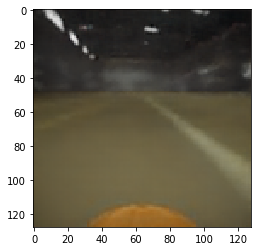

[-0.3279516   0.62789    -0.07553751  0.05931749 -0.15075806 -0.067612
  0.21896729 -0.03286833  0.18956137  0.1207433   0.18388116  0.58669406
 -0.36450535  0.18520236  0.06611589 -0.10594092  0.3924188   0.155785
 -0.09235968  0.11950472 -0.19548357  0.43511263 -0.58253473  0.09033719
  0.28656596 -0.29480624  0.13514878  0.6019022  -0.31950557 -0.24518265
  0.07883608 -0.12514298  0.41895062 -0.08216812  0.03973791 -1.0276347
  0.11735789  0.400439   -0.03085931 -0.5172725  -0.13242082 -0.30215383
 -0.16285548  0.2860919  -0.17675868 -0.01815446 -0.60548764 -1.294063
  0.4736109  -0.17291395 -0.17818524  0.00772309  0.5676088   0.19055973
 -0.57043344  1.1350558  -0.552956    0.24456394 -0.27276742 -0.12680101
 -0.5420093   0.4231556   0.21590829 -0.14650412]


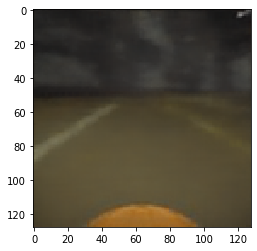

[-0.19019216  0.7048278  -0.14383985 -0.08463872 -0.15314175  0.11272976
  0.19027105 -0.08246088 -0.5112929   0.10150633  0.00495626 -0.02572761
  0.25037903  0.18589461 -0.0130117  -0.18639831  0.29744855  0.01084358
 -0.16539086  0.30231333 -0.16142789  0.36765957 -0.40865666  0.14796223
  0.36698273 -0.3449231   0.2046187  -0.47973326  0.37873113 -0.23393366
  0.25197685 -0.12137394  0.3945201   0.02769464  0.1615303  -0.8992256
  0.3321945   0.41979846 -0.05757951 -0.54819834 -0.03994185 -0.36836696
 -0.23076078  0.33645085 -0.14870915 -0.1382086  -0.64329714 -1.379697
  0.49653926  0.18614613 -0.08936875  0.4046762   0.43450084 -0.11521415
 -0.5862695   1.2758836  -0.5858953   0.30364543 -0.3133818  -0.13284026
 -0.01460601  0.4409888   0.233312   -0.06513668]


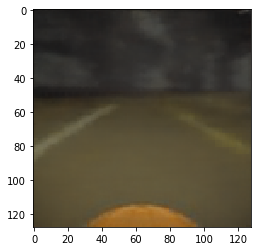

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.11381377  0.5271168  -0.27568436 -0.3904418  -0.6327203   0.17900969
  0.0570184  -0.3274194   0.00543089 -0.19768721  0.16864409 -0.343696
 -0.02874826  0.4227755   0.11081818  0.05011765  0.3597065  -0.29184085
  0.32707477 -0.35595998 -0.1878666   0.31796286  0.16227654 -0.30882043
  0.44760668  0.04902982  0.26756263 -0.2967912   0.8032805  -0.7301612
  0.15349677  0.41030785  0.35939243  0.17338161 -0.16497177 -1.0071484
  0.3061247   0.62732035 -0.64116955 -0.61749166 -0.13938105 -0.0581774
  0.41640526  0.08961297 -0.4021508  -0.4175648   0.23694336 -0.9724363
  0.41139936 -0.49950668 -0.78245777  0.24777882  0.1246408   0.10696551
 -0.62623435  0.80264133 -0.09536318  0.16143    -0.48783606  0.3407105
  0.07179113  0.72598743  0.40290892 -1.0383176 ]


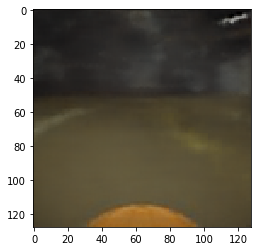

[-0.29902428  0.4815862  -0.14150766 -0.7809235  -0.59942806  0.00956356
 -0.14110914  0.04522331 -0.2903657  -0.3389191  -0.32134253 -0.5412296
 -0.6306732   0.34533378  0.16387954  0.28715596  0.73813343  0.43244773
 -0.6231359  -0.41543785 -0.04021719  0.01086051  0.84593695 -0.5694234
  0.658625   -0.22447488 -0.04342779 -0.32218885  0.45724022 -1.1059762
  0.99725825  0.6385461   0.81401014  0.0601742  -0.21367982 -0.9986883
 -0.00296783  0.6525458  -1.1991831  -0.45190895  0.04494154  0.2713779
  0.8615995   0.20027165  0.02347595 -0.1920631  -0.32108596 -0.7687997
  0.672964   -0.03598806 -0.736448   -0.14926402  0.35085458  0.11189529
 -0.6481001   0.6305069   0.46097568 -0.24767967 -0.5090484   0.21839094
  0.33717948  0.79504496  0.41098928 -1.6224177 ]


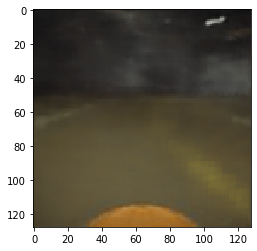

[-1.9497217e-01 -2.7240403e-02 -2.8214225e-01 -7.6150125e-01
 -8.5356414e-01 -2.6528636e-01 -3.8389426e-01  1.8351075e-01
  4.5222065e-01 -2.9979765e-01 -2.0664306e-01 -5.5515781e-02
 -4.5789868e-01  3.2432052e-01 -1.1394743e+00  3.2173231e-02
  2.2656421e-01  6.7095977e-01  4.3667731e-01  3.2523215e-01
 -1.6578597e-01  5.3405911e-01 -6.9624293e-01 -4.8988405e-01
  2.4648938e-01 -6.9186854e-01  2.5941762e-01 -4.5543462e-01
 -3.0364129e-01 -4.5688504e-01  5.3789854e-01  4.3528000e-01
 -1.9153738e-01 -3.1944178e-04  5.2532405e-01 -1.5025257e+00
  6.1370325e-01  1.6434817e-01  1.4584211e-02 -3.0660248e-01
 -8.0359775e-01  2.2921823e-01  1.6481723e-01  8.2366809e-02
 -7.6665038e-01 -5.1719457e-01  3.6208418e-01 -3.1774020e-01
  3.7257296e-01  3.7173206e-01 -9.9447078e-01  1.1356473e-01
 -9.4659626e-02 -6.4044461e-02 -8.0773866e-01  1.3379788e+00
 -3.5377300e-01  4.9566996e-01 -2.3808086e-01 -4.2845689e-02
  7.5042181e-02  4.4700497e-01 -1.5341936e-01 -4.1130784e-01]


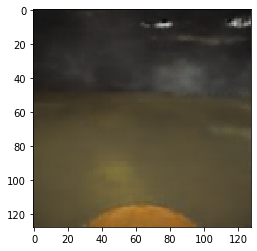

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.02448685 -0.48739523 -0.01307818  0.23370656  0.5225998   0.02480654
 -0.06187459 -0.30499107  0.80320203  0.6297984  -0.22819723  0.07248081
  0.08906358 -0.4498697  -0.44328865 -0.3569914  -0.8069607  -2.3629045
 -0.25717422 -0.49915013  0.02895313 -0.59479374 -0.28923392 -0.34059048
  0.1597301   0.7950632   1.518588    0.9882773  -0.17573948  0.22342817
 -0.12984104  0.1826537   0.34076065 -0.15659769  0.4114326   0.28306302
  0.46965072  0.28570852 -0.80373555 -0.1337581  -1.2481966  -0.695654
  0.3881994  -0.06382796 -0.96366495 -0.07499713 -0.31267366 -0.54274654
 -0.12015443 -0.10138324  0.3056265  -0.10892954 -0.61756146 -0.4129917
  0.50750196  1.7910742   0.5893667   0.60402924 -0.27171713 -0.1727244
 -0.21624292 -0.17870803  0.09769026  0.8763175 ]


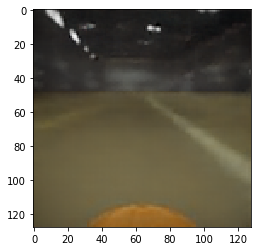

[ 0.27565017 -0.0184169  -0.35475266 -0.01424312 -0.90708303  0.30796075
 -0.3709578   0.6068561   0.27077067  0.27589512  0.7794247  -0.19546717
 -0.19473895  0.7066153  -0.3338939   0.00494999  0.45390707 -0.00529546
 -0.0176703  -0.8958854   0.2250827  -0.28293818  0.36163354 -0.37441203
  0.23121989  0.6543428  -0.05841092 -0.1864488  -0.5114714  -0.03404811
 -0.01874768 -0.10291797  0.4278161  -0.09562378 -0.591195   -0.9365885
  0.21658304  0.9710582  -1.0367527   0.34946287 -0.5521337   0.2368249
  0.41994837  0.06436706 -0.15094325  0.14713302  0.36919838 -0.7787523
 -0.09638277  0.11724263 -0.85646456  0.4877622  -0.41219434  0.53413093
 -0.01784964  0.6786939   0.4521795  -0.28968906 -0.49017364  0.38740358
  0.29655853  0.6591026   0.33088714 -0.9414263 ]


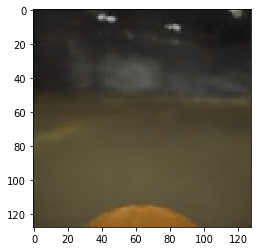

[-0.12581305  0.22921187 -0.03151357 -0.26732597 -0.6994545   0.164379
 -0.3999034   0.16767976 -0.5353855   0.07650538  0.11558998 -0.36158884
  0.34072697  0.11755668 -0.7938547   0.20663817  1.3906398   1.0650816
 -0.07494052 -0.18765761  0.2347087  -1.0643035   0.21075836 -0.10363713
  0.04403036 -0.13113296 -0.2940122   0.01118859  0.31003544  0.18096168
  0.41158813  0.0264962   0.49353144 -0.08118007 -0.23363777 -0.8948566
 -0.2844178   0.46476632 -0.6230164   0.23190483  0.38599926  0.36587524
  0.35258955  0.50962967  0.2279794   0.43380126  0.443911   -1.0650903
  0.19478028  0.07577178  0.24586116 -0.03691993  0.2615723  -0.04934696
  0.1223699   0.43833837  0.95580924 -0.581099    0.18253835  0.14074996
 -0.10432099  0.353977    0.23151447 -0.4701517 ]


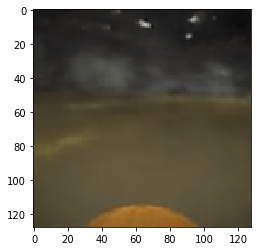

[ 0.61858475 -0.70195687 -0.2848426   0.3165096  -0.59993035  0.21136445
 -0.39392325 -0.17692706  0.0077632   0.95132697  0.7721776   0.0508737
  0.4828412   0.601333   -0.4500192   0.11655565 -0.20529841  0.82555836
 -0.257756   -0.48870248  0.18390095 -0.46566314  0.2975287   0.112567
  0.4119019  -0.2556183  -0.6079473   0.18334715  0.04526005  1.1459352
 -0.16506086 -0.6572563   0.16066127 -0.37178138 -0.9956736  -1.6948798
 -0.62573886  0.4287897  -0.36346003  0.27274883 -0.580795    0.5905103
 -0.43447012  0.571912   -0.10500278  0.82706714 -0.53074837 -0.46255693
 -0.60187364  0.1687704  -0.73050445 -0.16373956 -0.15575987  0.06408636
 -0.6689809   0.53821075  0.9540973   0.5249037  -0.6894642   0.75457865
 -0.34719065  0.30764627  0.05879251 -0.61126465]


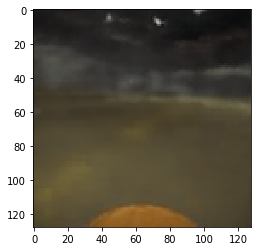

[ 2.8886646e-01 -1.2976084e+00 -3.5642588e-01  4.4414940e-01
  1.1842497e-01 -1.1218099e-01 -2.7431566e-01  2.3922418e-01
 -2.8582692e-01  5.5441523e-01  2.1169323e-01  7.6010913e-02
  2.2698486e-01  1.3205835e-02 -1.1619904e+00 -1.0364778e-01
  5.9651363e-01  8.0681711e-01  3.5062313e-01 -3.0785689e-01
 -4.1110376e-01  1.1386643e-01  1.1851750e-01 -4.8510570e-02
 -2.5375456e-01 -4.3784735e-01 -7.9253262e-01 -1.6875941e-02
 -6.7006655e-02  3.2779062e-01 -3.0393332e-01 -9.9116737e-01
  5.8889184e-03 -2.8435943e-01 -4.9155414e-01 -2.0519845e+00
 -1.4939710e-01  3.4709030e-01  3.3740422e-01  8.9114559e-01
 -1.2556037e+00  1.6446747e-01 -2.5343630e-01  7.0012957e-01
 -9.9652576e-01  1.6155446e-01 -7.0061535e-04 -4.5138341e-01
 -3.0254641e-01 -2.4144012e-01 -2.6486465e-01 -4.3558690e-01
  1.5168101e-01  1.4433059e-01 -5.1683508e-02  9.3933076e-02
 -1.0839806e-01  8.7080210e-01 -2.1874487e-01  2.2077717e-02
 -2.8494048e-01 -1.9997200e-01  6.0690060e-02 -4.5669615e-01]


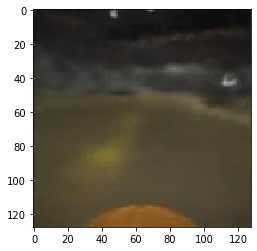

[-4.03230339e-01 -7.68473089e-01 -5.20522743e-02 -3.23347777e-01
 -1.81510031e-01 -5.53727932e-02 -6.45206928e-01 -2.06178799e-03
 -2.64100373e-01 -1.41997216e-02 -4.09492612e-01  1.03551030e-01
  6.99073613e-01  4.31650162e-01 -2.10545349e+00  1.01230904e-01
  1.25125706e+00  9.04870331e-01  1.12044528e-01  2.23745152e-01
 -6.18285358e-01 -3.04694027e-01  1.31965339e-01 -3.80739152e-01
 -5.93184710e-01 -4.08800483e-01  9.78460312e-02  1.84096023e-01
  2.41396844e-01  1.06777534e-01  6.71729684e-01  4.19025481e-01
 -2.63066560e-01 -3.97144943e-01 -1.03611082e-01 -1.34474063e+00
  4.52739671e-02 -3.57766986e-01  7.03253329e-01  3.22538137e-01
 -1.21536314e+00 -1.31199941e-01  3.96703213e-01  4.79808390e-01
 -9.93558109e-01 -4.27299291e-01  1.15885168e-01  5.37303463e-02
  3.15408520e-02  4.08162922e-01 -1.73787773e-01  4.46544766e-01
 -1.72567248e-01  5.08559287e-01 -7.35244751e-01  4.87175107e-01
  2.52784379e-02  3.87498051e-01  1.21808395e-01 -6.78141937e-02
 -6.13686442e-03 -2.96249

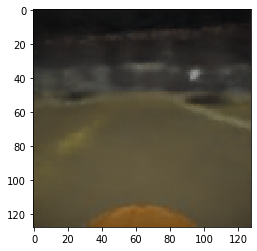

[-0.3529262  -0.35777858 -0.30066288 -0.5637262  -0.52607846  0.37754565
 -0.74540067  0.5427775   0.09662083 -0.38659185 -0.23960823  0.32917154
  0.04199771  0.6928389  -2.153184   -0.01146159  0.88585    -0.16019711
 -0.28507945  0.3387782   0.06076372  0.04306717  0.2884053  -0.6112236
 -0.04767177 -0.4598069   0.6972588  -0.14595315  0.12250925 -0.02797943
  0.33028573  0.36475667 -0.4651646  -0.11673884  0.52602065 -1.2166835
  1.1850897  -0.1337256   0.11004706  0.69226754 -0.9042601   0.09388587
  0.18927222  0.03990962 -0.61137754 -0.7539378   0.30102447  0.21555024
 -0.01778999  0.05949494 -0.57465196 -0.14881477 -0.7308746   0.01118082
 -0.2538949   0.6262553  -0.42196378  0.03858684 -0.09002955 -0.42758304
 -0.02179387  0.19180453  0.22523805  0.2927242 ]


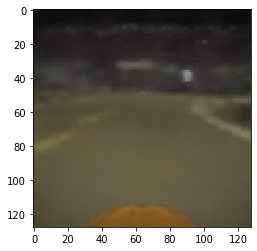

[ 0.07462381 -0.7490428  -0.09291497 -0.09652241 -0.5319369   0.4665614
 -0.4599546  -0.09734124 -0.20192695 -0.4213612   0.41345194  0.20520842
  0.16571449  0.10311997 -1.828735    0.0649169  -0.15204504 -0.7607857
  0.16124107  0.6349164   0.1658999  -0.42906952 -0.2168405  -0.09446694
  0.29177153  0.5070631   0.6499704  -0.13537881  0.08339812  0.39481524
  0.15110633 -0.42532527 -0.27249777  0.16347368  0.83810997 -0.21952997
  1.529508    0.13054985 -0.17909786  1.313934   -1.1994659   0.02168778
 -0.28403267  0.35430878 -0.6959763  -0.25836286 -0.23840487  0.08482597
 -0.37440836  0.23534092 -0.58007157 -0.08674213 -0.7831359   0.23352836
  1.1140205   1.5745386   0.01908596  0.5106068   0.11312201 -0.5023028
  0.6965697   0.07840797 -0.2395744   1.3978542 ]


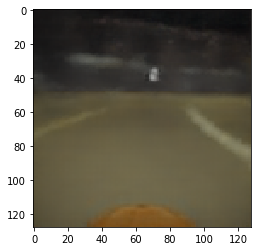

[-0.20966262 -0.8100541  -0.34723338 -0.23064466 -0.43673605 -0.04394619
 -0.63943493 -0.05124472 -0.46360373 -0.67449695  0.28786057  0.4868734
 -0.1476986   0.28872532 -1.9770743   0.12421643 -0.20169209 -0.7801553
 -0.29003397  0.76901704 -0.08959279 -0.12080711  0.5230993  -0.01636111
  0.28031346  0.583171    0.6789951  -0.16636361 -0.05601726  0.4850729
 -0.35927352 -0.570175   -0.40319768  0.21183762  0.8410277  -0.12891847
  1.4887253  -0.05538292  0.15730886  1.1072828  -1.237454   -0.33781403
  0.09457922  0.19815451 -0.6186388  -0.31587845 -0.47034323  0.42453328
 -0.42177254  0.04635227 -0.8391947  -0.01823926 -0.8972348  -0.30434498
  0.7895073   1.5828422  -0.5100949   0.5477507   0.03594841 -0.50299525
  0.19648632  0.10456887  0.37179238  1.4957933 ]


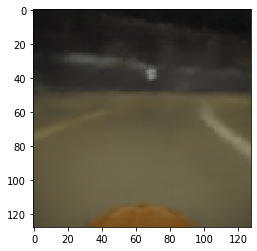

[-0.22327     0.47422814 -0.10485853 -0.7923461  -1.3533498  -0.09710854
 -0.98871094 -0.14800397 -0.22965853 -0.6092784  -0.21602805 -0.17174335
 -0.00352061 -0.31435266 -0.32945642  0.0635774   0.39003727 -1.5896188
  0.31498188  0.9229831   0.41065133 -0.78377575 -0.11356468 -0.4298169
  0.13251342  0.30957133  2.0026002  -0.24197163 -0.07144391  0.4731391
  0.09528002  0.24288806 -0.03949874  0.14734417  0.05009206  0.15947503
  0.5721089   0.03785967  0.60215706  0.41836777 -0.55074817  0.47749734
 -0.38205934  0.22505675 -0.6947631   0.21760254 -0.4018397  -0.94866705
 -0.16999887  0.22691613  0.10136492  0.07174421 -0.18720236 -0.19468293
  1.285625    1.243029    0.91946906 -0.23234402  0.703108   -0.4588361
 -0.12650809  0.14170241 -0.36976862  1.7702104 ]


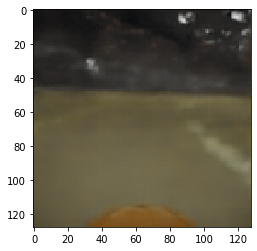

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.03569403 -0.61690116  0.07698565 -0.22400534 -0.68141776  0.26465425
 -0.95404375 -0.23325126 -0.62100434  0.11209305 -0.22550595  0.0095455
 -0.04612827  0.95135194 -0.16059986  0.02316665  1.030469    0.4343292
 -0.05888419  0.10793924  0.9778949   0.02332916 -0.26597682 -0.1719729
 -0.5754656  -0.11689668  1.1568422   0.06186343 -0.3931955  -0.46381846
  0.03687479 -0.43060228 -0.30855736  0.05724487  0.50997895  1.9836733
 -0.11227831 -0.63899094  0.12140907  0.44428474  0.35935274  1.2080262
 -0.24988729  0.7776046   0.6922515   0.8699174   0.06942245  0.36620015
 -0.3492198  -0.00934732 -0.10865436 -0.00822936 -0.4320284  -0.11499175
  1.0944241   2.5094411   0.85966116 -0.80700284 -0.27119443  0.34787303
 -0.22041047  0.6404268  -0.2580649   2.1295052 ]


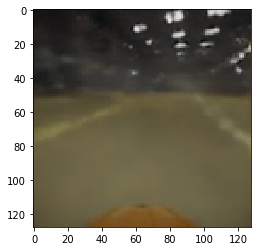

[ 6.1043441e-02 -4.5078889e-01 -4.1039464e-01 -4.4758815e-01
 -1.0897965e+00  8.3332971e-02 -1.1096431e+00 -8.1367821e-02
  1.1627396e-01 -5.1413268e-02  4.8778869e-02  4.1515507e-02
  3.8988858e-02 -6.7065209e-01 -1.1336310e+00  3.0558664e-02
 -6.4136440e-01 -1.1043285e+00  3.1772172e-01 -1.0928189e-01
 -9.1784194e-02  4.9244958e-01  1.8382350e-01 -1.6803057e-01
  9.2417878e-01  2.5455081e-01 -1.9749238e+00  1.1751315e-01
 -4.2711142e-01 -2.7081275e-02 -4.4454336e-01 -1.0038445e+00
  2.8844395e-01 -2.3204550e-01  1.3476572e+00  1.7344483e+00
  5.3872075e-04  1.0383086e-01 -5.3564966e-01  2.4767375e-01
  3.2043962e+00 -2.1913135e-01  1.7092192e-01 -8.9924030e-02
  6.0995936e-01 -2.7362967e-01 -2.2583973e-01  1.0331254e+00
 -6.8875813e-01  1.5356153e-01  3.8060957e-01  2.8200614e-01
 -4.0968055e-01 -2.0800152e-01  2.1256898e-01 -1.7161894e+00
  4.9676841e-01 -3.3665034e-01 -3.0192009e-01 -2.6665410e-01
 -6.0801692e-03  1.9935107e-01  3.7344357e-01  2.0877275e-01]


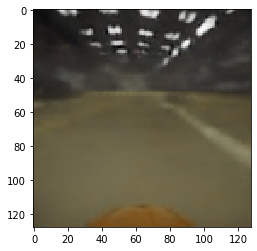

[ 0.42858064 -0.7078047  -0.06421728 -0.02447711 -0.7038146   0.71489805
 -1.31206     0.06995019  0.09141834  0.36877736  0.23253669  0.11905646
 -0.04093073 -0.57736295 -2.449351    0.12314466  0.6613863  -0.011358
  0.15653351 -0.00312554  0.60332704 -0.3100128  -0.34424728  0.2637297
  0.15622935 -0.8190839  -0.40862042 -0.13562746  0.10360688 -0.19806139
 -0.07952511 -0.83387136  0.5127301   0.06635775  1.1541218  -0.06414518
  0.97507095 -0.36839232 -0.28288674  0.29349875  2.5790296   0.4789762
  0.27124608  0.22641955  0.47186506 -0.60230523  0.24758968 -0.10386258
 -0.4451479  -0.21923836  0.9526823   0.25423    -0.4707459  -0.03450345
  0.52514386 -1.7115014  -0.01040947 -0.21850644  0.18889968 -0.0672714
 -0.22667018  0.33526713  0.5069645   0.27866262]


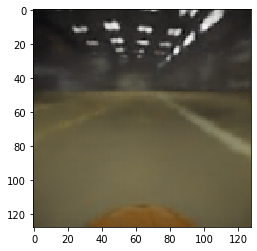

[ 0.14770858 -1.8472345  -0.56195456  0.4974378   0.59700906 -0.07105552
  0.9662697  -0.37028486  0.26219302 -0.18357217  0.7069437   0.2051662
  0.12529218 -1.1700311  -1.7613969   0.02038257  0.29884413  0.7013712
 -0.06051822 -1.1969174  -0.18031114 -0.5439894  -0.139103    0.02861774
 -0.20149526  1.0796107  -2.6041887   0.06104185 -0.05870519 -0.2907063
  0.27820775 -0.9111922   0.38746056 -0.017273    0.8844762   0.58290666
  0.26942253  0.7461716  -1.2932453   2.2826793   0.03972164 -0.05579551
 -0.5880424   1.0561163  -0.30237702  0.04261671  0.355393    0.6261264
 -0.5642795   0.00487138  0.46685487 -0.22679274  0.6592444   0.15547885
  1.1960073   0.01276887  1.6989661   0.97783023 -0.2589853   0.6482342
  0.15135917 -0.44223577  0.08732763  0.33082244]


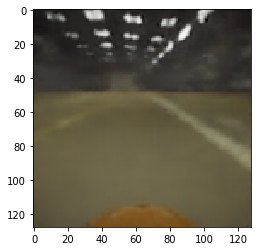

[ 0.06756373 -1.9134966  -0.61821663  0.24143252  0.61957926 -0.6196331
  0.6228671  -0.1563307   0.41183817 -0.3149959   0.6256988  -0.3551789
 -0.1817162  -0.77266026 -1.3643091   0.02975472 -0.10082669  0.27681428
  0.06117317 -1.1996084  -0.13320154  0.02598653  0.39690152 -0.21613586
  0.225495    1.1744491  -2.8287332   0.11145929 -0.0300709  -0.3260559
 -0.01231539 -1.2572465   0.65485936 -0.18585593  0.9783364   1.1113616
  0.30354893  0.6368681  -1.3688294   2.429365    0.3609198  -0.16819409
 -0.53945005  0.7844589   0.27937713  0.18157798  0.20100608  1.2143914
 -0.71088845 -0.31586787  0.08350253  0.05454745  0.5133197  -0.03345358
  1.1943321  -0.4358697   1.3144861   0.6984907  -0.6408718   0.4153235
  0.23560047 -0.30260837 -0.15359241  0.18711577]


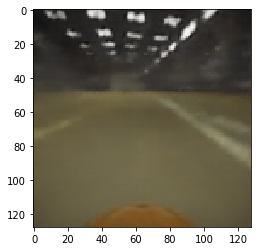

[-0.08644153 -1.7218229  -0.64088166 -0.14450407 -0.01408162 -0.3660046
  0.54718804 -0.24678612 -0.24080184 -0.47664905  0.4726252   0.02984934
  0.03368047 -1.4330438  -0.99382037  0.38594666 -0.8378161   0.24330008
  0.09619223 -0.90796566  0.14820315  0.14795041  0.3973435  -0.24117042
  0.47228602  1.0543951  -2.5758595  -0.2154202   0.05988833 -0.67354184
  0.04739706 -1.0784531   0.8008548   0.11658749  1.4556692   1.4509228
  0.30474168  0.6026185  -1.3873976   2.3193414   0.37187225  0.3263255
 -0.49861673  0.44374755  0.33308282  0.45233086 -0.1401619   1.6014098
 -0.6063304  -0.11162861 -0.20998988 -0.2698859   0.9211461  -0.07191265
  1.4684922   0.11403871  1.8107884   0.6222408  -0.3747499   0.43169016
 -0.04083759 -0.11269724 -0.28067234  0.5029216 ]


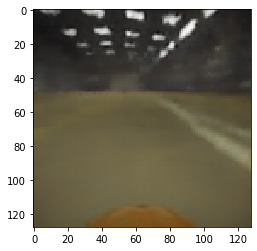

[ 1.8487327e-01 -9.3466806e-01 -1.9408940e-01  5.6360823e-01
  7.8317517e-01  2.6256415e-01 -6.9629151e-01  4.0376544e-02
 -3.1194916e-01 -5.8110133e-03  5.9065616e-01  9.5929466e-02
 -9.8231986e-02  1.6397642e-01 -3.1401129e+00  2.3991898e-01
  6.1436641e-01  3.5500154e-01 -1.5132445e-01 -1.8328162e-01
  2.0662470e-01  3.9712219e-03  2.1327574e-02  5.8605200e-01
  3.1044646e-03 -4.5678958e-02 -7.6932216e-01 -2.4820635e-01
 -4.9520826e-01  3.8406536e-02 -2.6286000e-01 -7.4848670e-01
  7.1599376e-01  1.9871151e-01  1.5842932e+00  3.0605501e-01
  8.7002969e-01 -8.9445823e-01 -5.3145146e-01  6.0952663e-01
  1.8161420e+00 -5.1019651e-01  2.4099083e-01  2.3022419e-01
  1.1288841e+00  5.8054999e-02  2.8359635e-02  1.2891878e+00
 -5.3664511e-01 -3.8604909e-01  6.5604258e-01  1.8909343e-01
 -6.9263399e-01  2.7288806e-01  1.5301448e-01 -1.2115507e+00
 -3.4270611e-01 -1.6899912e-01  1.3553787e-02 -9.0554416e-02
 -2.8037444e-02 -6.3923985e-02  1.2174095e-01  8.4415197e-01]


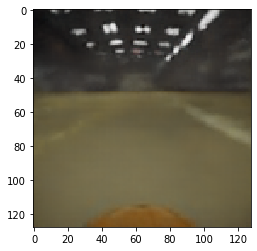

[ 2.31543034e-02 -1.29651797e+00 -1.54233605e-01  1.99401528e-02
  5.20843089e-01  2.51683086e-01 -1.06871700e+00  4.79709655e-01
 -5.00259101e-01 -1.41905025e-01 -2.01368690e-01 -6.53493464e-01
 -4.44861233e-01 -3.89440320e-02 -3.10010982e+00  1.29961610e-01
  6.96080565e-01  3.95929962e-01  2.34822258e-01 -4.86003578e-01
  2.87425756e-01 -1.41317740e-01  3.02619547e-01  2.10878532e-03
  3.81235003e-01 -7.13370621e-01 -1.76308766e-01 -3.51945043e-01
 -2.22751275e-01 -8.79342407e-02 -1.71091974e-01 -4.21361893e-01
  8.49530101e-01 -6.20654784e-02  8.59655082e-01 -1.28072226e+00
  1.05861437e+00 -7.11163044e-01 -6.18869007e-01  1.03156769e+00
  5.66382945e-01 -4.65371497e-02  5.68049431e-01  7.91647434e-02
  5.46388865e-01 -2.21419916e-01  1.66227221e-01  1.40629673e+00
 -5.56836724e-01 -9.12095755e-02  3.34354818e-01  1.38421118e-01
 -7.79484391e-01 -8.03283080e-02 -1.15975454e-01 -1.83527958e+00
 -1.10243425e-01  6.59330487e-02  4.99936007e-02 -1.72973156e-01
  3.30806553e-01 -2.64556

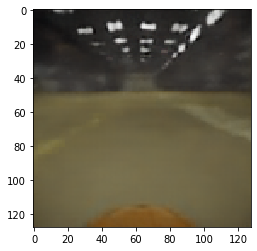

[-0.29162636 -0.5352577   0.39106658 -0.18822747 -0.0278214  -0.21182331
 -0.9933862   0.06239928 -0.32431746 -0.52956223 -0.2699917  -0.04212645
  0.1182664   0.35719907 -0.9637112  -0.01024532  0.23442464 -1.4583395
 -0.17241535 -0.44796628 -0.07411096  0.4837626  -0.00722436  0.18589698
  0.8262087  -0.29152384  0.51390886 -0.21504068  0.2923411  -0.24381486
  0.10359213 -0.8193741   0.4722292   0.24175481 -0.555883   -1.9304281
  0.46932808 -0.31925517 -0.13670072  1.4919752  -0.41292235  0.1977272
  0.16457517 -0.10634654  0.03587206 -0.06823345  0.2437171   1.1043104
 -0.87322307 -0.2764944  -0.5892433   0.34517723 -0.6527087   0.23265253
  0.4189086  -2.1858318  -0.16616999 -0.51059264  0.33090305 -0.38559055
  0.31629488 -0.21585843  0.22043568 -0.1175445 ]


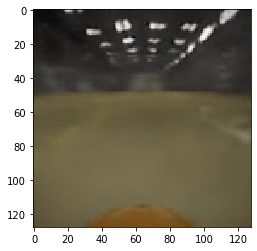

[ 0.34364846 -0.4466859   0.32166594  0.21554294 -0.43076912 -0.34097442
 -0.9696143  -0.02452724 -0.0630753   0.12930104  0.03939006  0.3507606
 -0.27708238  0.8371333  -1.208435   -0.13531853  0.6836788  -0.36211923
  0.04906193  0.38370293 -0.0029973   0.3039263   0.21843533  0.42126393
 -1.1311647  -0.22916447 -0.06633246 -0.27622482 -0.03416927 -0.33626798
 -0.1214181   0.41316172 -0.24540552  0.24585393  0.87736297  2.2562528
 -0.64726335 -1.3090004   0.85224867 -0.7683445   2.0170102   0.3348734
  0.3778792   0.30251965  0.39846295  0.6315253  -0.263072    1.4011372
 -0.4906097  -0.0278275   0.22906144  0.2056609  -0.03825782 -0.02872887
 -0.00737033  0.1593282   0.80913746 -0.4261068   0.15636326  0.37909997
 -0.42843977  0.22586055  0.4733046   1.9241639 ]


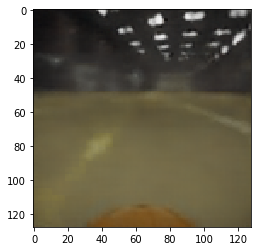

[-0.0189506   0.24904644 -0.26344407 -0.61538535 -0.56526256 -0.05873325
 -0.47662312  0.33675545 -0.35629046 -0.38406232  0.5146339   0.37679476
 -0.49616587  0.2131103  -1.1339638   0.13319914 -0.54171693 -1.0345889
  0.06804243 -0.0501377  -0.33643332  0.17020918  0.31816357 -0.47690427
 -0.289574    0.540976    1.4803697  -0.21613076  0.00746537  0.42814302
  0.16429691  1.2929927  -0.07891288 -0.05192371  0.29901618  0.23218355
 -0.09111285 -0.9706186   1.046281   -1.0391139  -0.549751   -0.29554957
  0.06899075 -0.41110784 -0.46460205  0.24122879  0.48383686  1.1291255
 -0.19731624  0.34451976 -0.7974148  -0.18817405 -0.3962059  -0.05498869
 -0.97494036  0.47553974  0.7385328   0.19365585  0.7091791   0.2572372
 -0.2095035  -0.31642047  0.16239958  1.6478715 ]


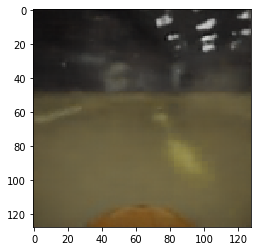

[-0.39487115 -0.18777646 -0.25390685 -1.192976   -1.2449831   0.14753416
 -1.2265368  -0.01197576  0.01981212 -0.5393919  -0.15990466 -0.15833713
  0.4108986   1.6254936  -1.2748189   0.33524394  0.8386986   1.0927786
 -0.11959422  1.1362399   0.68723893 -0.22714932 -0.6945147  -0.42908183
 -0.13284276 -0.3613545   0.5985856   0.02007404 -0.5338027   0.9361951
  0.30408543  0.6918249   0.4181382  -0.01686356  0.07661231  0.31963345
 -0.01376035 -0.5974149   0.4995451   0.83850175 -0.39258304  0.59793335
 -0.18608204  0.34158093  0.9327904   1.4225104   0.11090423  1.3461719
 -0.30849203  0.3120139  -1.114988   -0.01671793  0.15194027 -0.2492756
  0.18202892  0.8915041   1.0554713  -0.6202882   0.5403377  -0.3834959
 -0.1077599   0.1436572  -0.10300367  1.4404227 ]


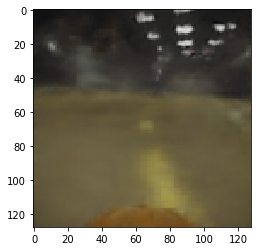

[ 0.09706405 -0.33061743 -0.30322453 -0.41780028 -2.0778553  -0.15011357
 -0.79962695  0.06979565  0.28421843 -0.17388722  0.2400613   0.07885937
  0.13698298 -0.4986315  -0.6534854  -0.15303105  1.0399485   2.1094317
 -0.03110875 -0.46133816  0.6920035  -0.7336084  -0.09823044 -0.44573334
  0.35681558  0.37353072 -1.1557149  -0.16693129  0.01376892  0.9666386
  0.4533549  -0.9962675   0.15959144 -0.36690766 -0.05054491  1.086284
 -0.86416453  0.7673322  -0.67612123  0.95161164  1.5634073   1.1296386
 -0.46126112  0.6127529   1.1927948   1.6545974   0.24111742 -0.42804548
 -0.48244554 -0.06840016  0.5732743  -0.01400865  0.02275409  0.05362037
  1.0528922   0.5858408   1.7421339  -0.98522323  0.65844554  0.7030431
 -0.6034674   0.27888733  0.32880592  0.9355773 ]


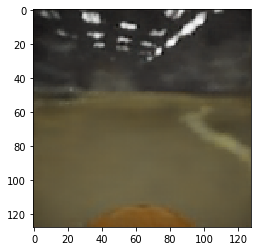

[-0.16022384 -0.07583592 -0.5403625  -0.07870737  0.61050254  0.05228309
  1.1020035   0.74262804 -0.67923975 -0.12467468  0.40807426 -0.2325064
 -0.09096887 -1.9361689  -0.64968    -0.00688549 -1.2162464  -0.4321386
  0.78703165 -0.6015607   0.40622416  1.2234558  -0.27625892  0.04854539
  1.363617   -1.053795   -2.3737535  -0.01495185 -0.59269464 -0.30088133
  0.16956817 -1.1707791   0.21512619 -0.05299311  1.480159   -0.7163987
 -0.25574866  0.2687269  -1.0578933   0.2325692   2.547594   -0.17141826
 -1.200485   -0.1772828   0.8759736  -0.23691493  0.1024182   0.7911907
 -0.5003816  -0.11647426  0.43531722  0.3054323   1.1099836   0.04872128
 -0.6445441  -1.3959777   0.782946    0.9099337  -0.41176575  0.20617251
  0.14256534 -0.05529654 -0.28605014 -0.19380397]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


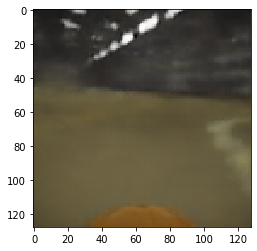

[ 0.2947986  -0.20339854  0.08517724  0.12242999  0.4362617  -0.3016312
  1.7453836   0.12685713 -0.02683293 -0.12732294  0.21026571  0.2648541
 -0.04544661 -1.4203442   0.07012945 -0.11441754 -0.84516996 -0.6572648
  0.28471634  0.1831076   0.2081905   1.7227918  -0.1618326  -0.12951133
  1.133148   -1.7432896  -2.0259786  -0.23739247  0.15303661 -0.2908917
  0.03656844 -1.2694106  -1.0410652   0.33014384  0.31189907 -2.2442887
 -0.37366834  0.83395976 -0.7897284  -0.27777475  1.592972   -0.63721037
 -0.13259335  0.2008137  -0.2432119  -0.41236398 -0.18362346  0.19735381
 -0.45836392  0.40688422 -0.7532014  -0.10478035  1.201195    0.10940115
 -0.7266928  -0.7829721   0.09238639  1.7995223  -0.25322032  0.04120061
  0.08880089  0.30724648  0.11745832 -0.9131736 ]


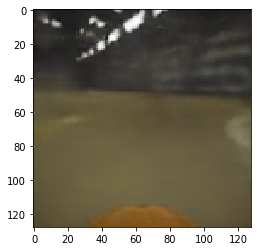

[ 0.28575957 -1.0629423  -0.21402691  0.40245235  0.9223986   0.32643348
  1.0233048   0.08244243  0.05060749  0.43938327  0.11250268 -0.3101868
 -0.08904972 -0.523611   -1.6548134  -0.31419277 -1.0884471  -1.2512112
  0.24483618 -1.2806534  -0.09708063  0.4682394   0.82386804 -0.20627198
  0.641864    0.16684754 -1.4264762  -0.19725892 -0.39917624  0.32539153
  0.47961134 -0.27438828 -0.261456   -0.3061271   0.39142767 -1.2044939
 -0.10074557  1.0030084  -2.0919037   0.9150961  -0.37931883 -0.74386865
 -0.24214327 -0.3521153  -0.19084963 -0.31527686  0.17978996  1.1052701
 -0.6513808   0.20343164 -0.5117826  -0.10533363 -0.2317963  -0.2960016
 -0.49225074  0.11061582  0.7359274   1.2632511  -0.96983814  0.47748488
  0.3397256  -0.38584933  0.10424449 -0.504273  ]


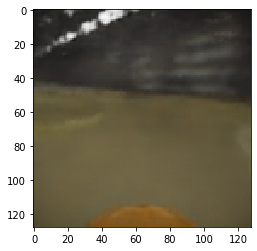

[ 0.3984886   0.63898176 -0.06658611 -0.2999716   0.66891533  0.10511822
  0.40452802  0.38201717 -0.06641424 -0.37645122  0.35334587  0.4078623
  0.2563244   0.24021761 -1.5267565   0.08077298  0.01386081 -0.2844882
 -0.71888036  0.41801783  0.20274422 -0.09843293  0.59744143  0.04634701
  0.16388123 -0.27814534  1.2872418  -0.01838395 -0.46864313  0.45666847
  0.02358215  1.0761193   0.10522608  0.20330682  0.7204845  -1.1090466
  0.5313454  -0.39545685 -0.44304478 -0.7625137  -0.49348852 -0.19830003
 -0.5493031   0.15519808 -0.11532658  0.11460603  0.5801862  -0.18541959
  0.11619484 -0.33512205 -0.01251184  0.14019425 -0.2402556   0.01866744
 -0.7939737   1.3896809   0.4262158   0.53004086  0.05517307  0.0445535
  0.6978058   0.24010512  0.25253636  0.85396165]


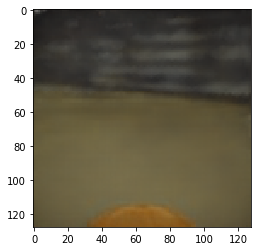

[-0.36336845 -0.7533125  -0.3241857  -0.2101802   0.03490628 -0.25740403
  0.2958591   0.21917962 -0.2791469   0.34578702 -0.34998932  0.47743416
 -0.15688455 -0.13789551  1.0726775   0.00569382 -0.84214395 -1.1304404
  0.3708617  -0.13096894 -0.05143655  0.529147    0.33495507 -0.3024045
  0.48561275  0.8140379   0.00725393  0.20963134  0.04484075 -0.54458636
 -0.09258793 -0.8601984   0.44196647 -0.23641919  0.30243665  1.1584764
 -0.08255811  0.8698371  -0.92060393  0.4692247  -1.2202551  -0.5530043
  0.40751418  0.11833148 -0.49718165  0.26128346 -0.1665433  -0.24955294
  0.1656884   0.20646201 -0.64231557  0.5162984   0.49383396  0.04689584
  0.6526024   2.9754946   0.08246506  0.6320267  -0.9151524  -0.1822753
  0.19724536  0.49057594  0.3611753   0.31247097]


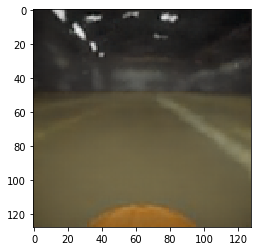

[ 2.7490288e-01  8.6701870e-01  1.7116342e-01 -5.3361571e-01
 -1.2614563e-01  1.0655452e-01 -7.4611925e-02  6.5630302e-05
 -2.7978766e-01 -2.4240205e-01 -2.0066023e-02 -4.5295453e-01
  3.0999005e-01  2.8279784e-01 -1.4412601e+00  9.7965971e-02
 -1.7569534e-02 -2.8003430e-02 -7.9167411e-02  5.8907837e-01
  4.5698011e-01  6.8194792e-02 -1.7151251e-01  9.8497815e-02
  2.0568372e-01 -6.7861742e-01  1.2368277e+00  1.6605355e-01
  2.3152080e-01  5.3423500e-01  1.0176337e-01  9.9555773e-01
 -2.7495047e-02 -4.3170743e-02  7.9455286e-01 -7.0904362e-01
  1.5878971e-01 -2.9269055e-01 -3.4758577e-01 -1.1031491e+00
  3.4449953e-01  5.9209064e-02 -4.0378523e-01 -2.5112998e-01
  3.3020601e-01  2.3063484e-01 -3.3585316e-01 -8.2696453e-02
  1.7928381e-01  8.1374690e-02 -4.9384072e-02  5.9542602e-01
 -1.7432031e-01  4.3369907e-01 -8.4750968e-01  1.4485418e+00
  3.0023119e-01  1.6251300e-01  1.3209520e-01 -7.1703047e-03
 -5.5631030e-01  4.0936744e-01 -1.6528358e-01  8.9050192e-01]


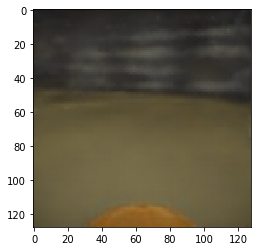

[-0.1796577   0.595654    0.04261975 -0.61916304 -0.44635242  0.40164
 -0.1385185   0.11624412 -0.44975737 -0.3092155   0.11496149 -0.6207987
  0.00698744  0.7736049  -0.80949533 -0.00331833 -0.1301703   0.1218968
  0.39102945  0.13996762  0.37309235  0.09653728 -0.27065158 -0.11894776
  0.40885317 -0.17630981  0.7055249   0.3481084   0.6399451   0.05475947
  0.40986747  1.0780929   0.30021438  0.15069163  0.6674756  -0.21590813
  0.15584864  0.03379164 -1.0773578  -0.787718    0.15406024  0.17425415
 -0.09274164  0.00414929  0.38784888  0.3779039  -0.01192842  0.08582956
  0.29966095 -0.43228537 -0.6982012   0.24497336 -0.30378574  0.3214263
 -0.7276825   1.7103739   0.60346055 -0.1052145  -0.2527243   0.16866896
 -0.39105892  0.6345556   0.10417081  0.24700958]


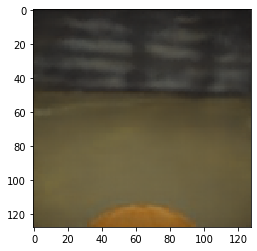

[-0.08174583  1.700743   -0.94674647 -0.479164   -1.3133458  -0.17885399
 -0.861146   -0.03607467  0.10144708 -0.25448602 -0.16190399 -0.04883598
 -0.20630628  0.7886873   0.99744296  0.20500769 -0.13331452 -0.54115254
  0.25433204  0.51044565  0.00484294  0.8605127   0.2839914   0.04388056
  0.5885147  -0.28808755  0.80821246  0.07339671 -0.72374856  0.20369351
  0.40300477 -0.05110032  0.5447928  -0.02469476 -0.36908892 -0.04549229
 -1.1422101  -0.11702745  0.64038724 -1.1032057   0.7738714  -0.18900263
 -0.3294882  -0.36524585  1.2000014   0.8434547   0.3971338  -0.7834901
  0.12198605  0.27907142 -0.7693877   0.14556184  0.4955949  -0.08673581
 -1.1511377   0.8462229  -0.12267695 -1.142274   -0.00534402  0.2840047
  0.0881094   0.3916977  -0.44687003  0.2844645 ]


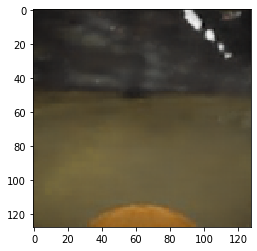

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-1.21314451e-03  7.56769896e-01 -7.17296660e-01  4.58010100e-02
 -6.50078535e-01 -5.50742261e-02 -1.15258649e-01 -1.34735927e-03
 -4.78972733e-01 -3.93130153e-01  1.92928001e-01  2.47770399e-01
 -3.42426300e-01  8.68008018e-01  1.73904335e+00  2.56573647e-01
 -4.73987669e-01 -2.58652925e-01 -1.20609745e-01 -5.64556122e-01
 -3.15558016e-01  1.06680298e+00  1.90456852e-01 -3.68995577e-01
  6.28478706e-01  7.39578009e-01  1.25255620e+00  4.46982205e-01
 -2.61801720e-01  1.74868479e-02 -3.01094115e-01  6.09898157e-02
  4.74229187e-01  1.03902258e-01 -6.90728366e-01  2.29929924e-01
 -6.25614882e-01 -3.83292064e-02  1.10936351e-01 -1.18834102e+00
 -8.93794954e-01 -1.73513934e-01  2.35452622e-01 -4.25231993e-01
  5.29082060e-01  1.27463353e+00  2.94686794e-01  5.12477942e-02
  1.49429902e-01 -3.13308805e-01 -1.65768182e+00  3.62942845e-01
  9.01808143e-02 -2.50787288e-03 -7.43200362e-01  1.95942783e+00
 -5.24550825e-02 -2.68873483e-01 -3.48598659e-01  5.49126565e-01
 -2.72362351e-01  4.41112

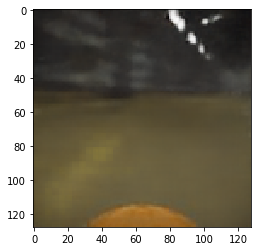

[-8.7792747e-02  4.8387423e-01  2.0827350e-01 -4.0261880e-01
  2.4158946e-01 -2.2502139e-01  7.4964452e-01  6.0527831e-02
  6.4824688e-01 -3.7409833e-01 -2.5313821e-01  1.3242389e-01
  9.9904880e-02  4.3527913e-01 -5.8373969e-02  3.4565574e-01
 -2.5522155e-01  1.1372678e+00  2.8007472e-01 -2.5102440e-01
 -6.7123407e-01  1.4271940e+00  4.8114532e-01  9.7758524e-02
 -8.7435499e-02 -1.8691166e-01 -6.2859488e-01  3.0818060e-01
  1.3785408e-01 -1.1235267e+00  5.8926994e-01  1.0852261e+00
 -8.5784577e-02  2.5197861e-01  1.1278623e+00  4.4824934e-01
 -9.4707054e-01  1.3173053e-01 -1.2726353e+00 -1.8828511e+00
  3.5712364e-01  1.6915010e-02 -1.6884559e-01  7.6455079e-02
 -9.3630239e-02  4.1446003e-01 -2.7319297e-01  3.2906863e-01
  6.9462979e-01  2.8685024e-01 -6.4853120e-01  2.2014510e-03
  3.3061382e-01  3.3444273e-01 -1.3265350e+00  3.1390371e+00
  3.7598160e-01  3.3206338e-01 -8.8243186e-01  5.4126310e-01
  2.8274879e-01  8.7617242e-01 -1.1010242e-01 -5.8477566e-02]


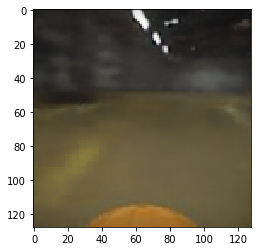

[-0.09333351  0.84027666 -0.23293386 -0.07462974  0.34508267  0.39365843
  0.83232856 -0.04226031 -0.13704073  0.13542832  0.14250407  0.30052614
  0.28499046  0.09735393  0.6500966   0.24680182 -0.20621555  0.18511117
  0.2041335   0.32355508 -0.18587574  1.9098873  -0.06631628  0.4511927
  0.7674424  -0.9605751  -1.3993511  -0.09412812  0.31540745 -0.84075546
  0.14152813 -0.8594001   0.21627675  0.28667402  0.31466073 -0.9682258
 -0.98324466  0.7219892  -1.0606732  -1.0363157   1.4863209  -0.58785725
 -0.4813803   0.00780753  0.8029505   0.25408435 -0.3844954  -0.80449134
  0.33269545  0.06142839 -0.4715134   0.1433627   1.1699245  -0.06692085
 -0.96331716  0.6838146  -0.66501325  0.08332485 -0.61301816 -0.04769571
 -0.31167924  0.9238059  -0.18101066 -1.3383036 ]


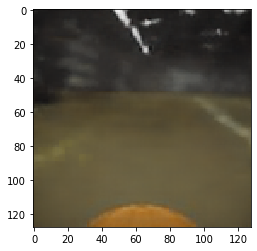

[ 0.01154847  0.22173761 -0.16165648  0.01043512  1.0996274   0.02672921
  0.21080038  0.36243615  0.10399444  0.21587539 -0.19942078 -0.00373621
  0.13791017 -0.45400542  1.0758524   0.15190026 -0.13353413 -1.4022443
 -0.2106595   0.59107214 -0.42084178 -0.659528    0.45493853  0.40714905
  0.39002484  0.50501275  1.5993776  -0.2594489  -0.06665079  0.09536105
 -0.36518925 -0.40860176  0.24337217 -0.31346783 -0.00570567  0.50248295
 -0.27360606 -0.79982823  0.9546891  -1.0517824  -0.63018525 -0.8390108
  0.0207383   1.1451067  -0.6893851   0.13643162 -0.1003776  -1.3800724
  0.1855065   0.24358644  0.6424875   0.24682035  0.12989712  0.11933499
 -0.3258007   2.1008124   0.37702137  0.7296709  -0.27226585 -0.06864905
 -0.26630694  0.16080475  0.43927515  1.5597733 ]


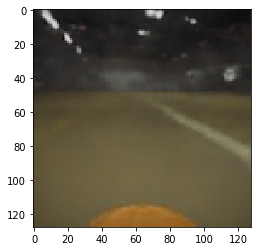

[-0.03619968  0.38357282 -0.09006849  0.03319066  1.0137976   0.10685609
  0.11800135 -0.13133615 -0.48788851  0.06540161 -0.33452484 -0.03666203
  0.17477044 -0.5703923   0.51237726 -0.00782224  0.257358   -1.4171201
  0.6094017   0.5129614  -0.3075494  -0.6876679   0.06565364  0.33861765
  0.10027983  0.2598352   1.9109583  -0.27453268  0.4529432   0.11509618
  0.05958368 -0.18496051  0.16951115 -0.22665766  0.05099072 -0.01022124
 -0.01492368 -0.71905416  0.8883966  -0.7792142  -0.7386277  -0.5735779
 -0.3249943   0.93073905 -0.8686235   0.08542985  0.07786036 -1.5354865
  0.13013285  0.54106086  1.1033833   0.73704857  0.04493333  0.44539565
  0.02999682  1.7735103   0.37796858  0.52570236 -0.06745608 -0.2669387
 -0.04402393  0.03440595 -0.1557549   1.6462774 ]


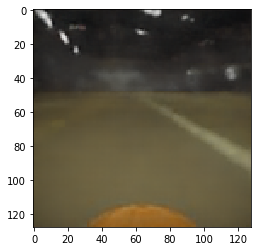

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.3285798  -0.36734802 -0.06273315  0.17864749  0.53147393 -0.20250694
 -0.04315186  0.10077398 -0.00246839  0.45322368 -0.39901572  0.02844383
 -0.15301298 -0.43869227 -0.42521083 -0.30071726 -0.60850465 -2.3019977
  0.03747695 -0.42337087  0.03147108 -0.6224443   0.4841314  -0.3068474
  0.1377737   0.7281742   1.538834    0.12029813  0.00496801  0.2703155
 -0.2907446   0.21779469  0.28009892 -0.14590721  0.39326066  0.22830106
  0.41166496  0.33810264 -0.81579435 -0.19639692 -1.1596385  -0.70134544
  0.32665205 -0.03299042 -0.97198284 -0.03240146  0.04644521 -0.68146974
 -0.07820935 -0.14615116  0.4255475  -0.7084386  -0.56931925  0.04298417
  0.5355274   1.893258    0.57951754  0.6008274  -0.26451874 -0.14933237
  0.28653774 -0.1886019  -0.4268052   0.90874505]


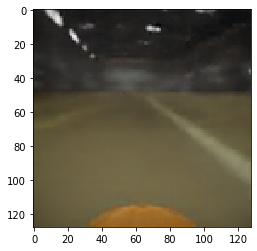

[ 0.08147528 -1.0200394  -0.15322207  0.08110113  0.08901021 -0.14461036
 -0.22732912 -0.39246547  0.29353136  0.5474519  -0.38431746 -0.31105897
 -0.05478906 -0.8969822  -0.40265447 -0.32730734 -1.0578593  -1.8419284
  0.22607139 -0.6599986  -0.18646106 -0.4226371   0.41402063 -0.39600694
  0.25017744  0.9954927   0.9369259   0.40740672  0.34817928  0.01422784
 -0.41248918 -0.09666561  0.7157924  -0.21130848  0.32324356  0.2791172
  0.37002754  0.58045316 -0.73028326  0.23143634 -1.6246322  -0.5464023
  0.75625265 -0.24934666 -1.1860019   0.00618465  0.5680502  -0.17726444
 -0.01331087  0.12062705  0.02203505 -0.55356824 -0.21021257  0.201176
  0.7248243   1.6887335   0.5573379   0.8734668  -0.16442634 -0.11026379
 -0.15142585 -0.34559816  0.3462744   0.59251434]


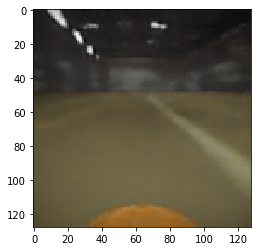

[ 0.10588054 -0.7471347  -0.2721142   0.08773781  0.39405328  0.04629369
  0.46201935  0.00820957 -0.19854951  0.29438677 -0.533582    0.35688636
 -0.05640308  0.05396323  0.94898945 -0.10517863 -0.5371709  -0.5709977
 -0.11687486 -0.12031275  0.02486606  1.0137218  -0.17492282 -0.16015336
  0.15006907  0.5924707  -0.47516605  0.23269252  0.06665452 -0.71416736
 -0.43046832 -1.1190485   0.33586356 -0.16727899  0.51867986  1.579563
 -0.48477218  0.79154986 -0.7383273   0.6731556  -0.8573946  -0.5487665
 -0.05163081  0.15408924 -0.03854009  0.53684723 -0.3442379   0.10288534
  0.07519203  0.2927232  -0.41559193 -0.08952217  0.7470439   0.55211145
  0.7035356   3.082456   -0.05790025  0.34654048 -0.994571   -0.22041874
 -0.0247001   0.39211854  0.04036583  0.72288924]


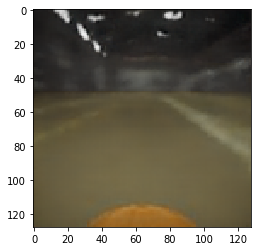

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-2.26962864e-02 -1.07253718e+00 -1.37426034e-02  3.73435944e-01
  4.34047878e-01 -7.77040124e-02  1.73188373e-01 -1.65142581e-01
  4.80895191e-02 -6.46823645e-03 -1.00553766e-01  6.04335517e-02
  1.61716789e-02  3.77046704e-01 -1.89133763e+00  1.48164481e-03
 -2.03310698e-01  4.91733938e-01  2.71023810e-01 -7.28334129e-01
 -1.48429126e-01  3.87662917e-01 -1.09763876e-01  1.56197205e-01
  3.50516289e-01  4.58651155e-01 -1.35821247e+00  5.15118949e-02
  8.44431296e-02 -3.37422311e-01  2.13951588e-01 -3.87837172e-01
  3.14611942e-01  1.15038730e-01  8.25896919e-01 -3.31487358e-01
 -7.75845721e-02  7.36167133e-01 -2.00281739e+00  1.28332841e+00
 -7.24658012e-01 -4.98418868e-01  2.53797144e-01 -1.91747263e-01
  4.47081417e-01  4.06512409e-01  1.38541311e-02  1.42114055e+00
 -1.99380666e-01  2.08981067e-01 -7.40887463e-01  1.05285957e-01
 -2.36008972e-01 -1.02534652e-01  8.50285441e-02  1.43565369e+00
  2.20392913e-01  2.22286984e-01 -5.99360585e-01 -4.25351178e-03
 -2.96825916e-01 -9.92061

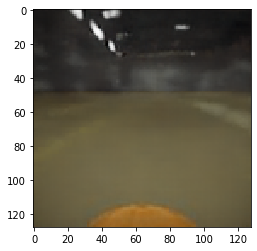

[-1.9870713e-01 -6.8648882e-02 -2.4708277e-01  7.8388728e-02
 -9.0158656e-02 -3.9822793e-01 -5.0443254e-02 -1.3042435e-01
 -8.3382487e-02  4.5965843e-02  1.4796314e-01 -1.6677999e-01
  1.5837498e-02  2.7986133e-01 -2.1780572e+00 -5.2625246e-02
 -8.1993085e-01  4.0707812e-01 -2.6857772e-01 -5.8515078e-01
 -1.3384029e-01  7.9616654e-01  1.1187976e-01 -3.0205160e-02
  9.9528527e-01 -4.0767092e-01 -1.3432609e+00  2.5015962e-01
 -9.5310450e-02 -1.2750147e-01 -1.9054348e-03  2.5145683e-01
 -3.8567275e-02 -9.4986558e-02  1.1348121e+00 -1.4189001e+00
 -2.4178734e-02  4.2586225e-01 -1.8778502e+00 -3.9815761e-02
  3.5054377e-01 -3.2021356e-01 -2.4513985e-01 -3.8117686e-01
  6.2570697e-01 -2.4233279e-01 -1.1387370e-01  1.0596633e+00
 -1.5464786e-01 -2.0825525e-01 -1.0763677e+00 -1.8960136e-01
 -6.8086547e-01  9.9604420e-02 -1.5603775e+00  8.4891492e-01
  2.2589262e-01  2.3218673e-01 -7.8690070e-01  2.8571531e-01
 -6.1875865e-02  7.7535629e-02  1.7512779e-01 -7.7155191e-01]


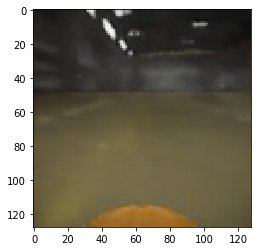

[-2.82462358e-01 -3.31305936e-02 -2.53890246e-01 -7.51198083e-02
 -5.73997676e-01  1.76269144e-01 -3.91524583e-01 -1.48889929e-01
 -4.64984834e-01  3.34023982e-02  1.23349935e-01  2.29255166e-02
 -9.50797796e-02 -1.74521089e-01 -2.40755677e+00  7.24149719e-02
 -9.29967642e-01  5.50152540e-01  4.67096925e-01  1.05014825e-02
 -2.24806927e-03  6.62872910e-01 -5.54105937e-02  5.21195261e-03
  1.12111700e+00 -7.83755898e-01 -1.46720493e+00 -1.17499366e-01
  3.38356972e-01  3.29575270e-01  5.37907720e-01 -2.21130904e-02
 -8.32880586e-02  1.67196039e-02  1.37712944e+00 -1.70199406e+00
  2.16359958e-01  5.44498920e-01 -1.54752779e+00  3.20650399e-01
  2.73836136e-01 -2.19255641e-01 -4.41387206e-01 -5.54484546e-01
  4.80822861e-01 -1.32242635e-01  2.74644047e-01  9.31108057e-01
 -1.56250134e-01  9.54246074e-02 -1.05474699e+00 -2.06371993e-01
 -3.89945090e-01  3.64821196e-01 -1.24579072e+00  9.64266658e-01
  1.48829266e-01  2.68801689e-01 -4.01470870e-01 -2.10777536e-01
 -8.05348009e-02 -5.43148

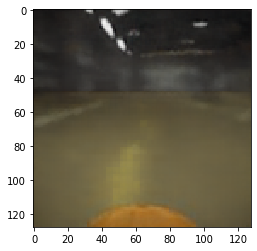

[-0.31437856  0.40318647  0.05268643  0.16522036 -0.52204275  0.08339769
 -0.5539858   0.12100831 -0.0365373   0.25956026 -0.08326546  0.46678495
 -0.05489241 -0.40585488 -2.6850352  -0.10995036 -0.5124896   0.88013077
 -0.09860063 -0.11626547  0.07742957  0.02988764  0.24370274  0.3143897
  0.8009033  -0.78113586 -0.920517    0.27189836  0.19121815  0.36060277
 -0.13178009  0.3385458   0.27402133  0.07504716  1.4631747  -1.5267682
  0.14437331  0.33082473 -1.3960038  -0.07553624  0.62106615 -0.10304586
 -0.36147255 -0.5011181   0.536681    0.01978263  0.11443602  0.47223556
  0.08361091  0.14047958 -0.15244915 -0.2993082  -0.32394266  0.22604352
 -1.2155049   0.9100086   0.3709082  -0.05716474 -0.04374797 -0.16425952
 -0.19107617 -0.12927479  0.4926248  -0.02265031]


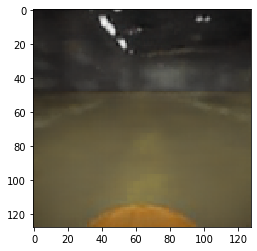

[-0.48199975  0.76755136  0.5780859  -0.3724317  -0.08611804 -0.06339794
 -0.11220314 -0.01589861  0.03363321  0.15334411 -0.23005356  0.12381241
 -0.25657648 -0.99017996  1.1019377   0.14504889  0.05121533  0.71687365
  0.1341039  -0.3995575  -0.27527416  0.0130448   0.30827022 -0.0584498
  0.7602931   0.32293677  0.66672635 -0.04359069  0.24802299 -0.90114653
  0.19462036 -0.12787066  0.5356621  -0.1162258   0.69659585  0.78117526
 -0.5715759  -0.13004687 -0.15483266 -1.9404345   0.7689466  -0.10052235
  0.43876565  0.4307586  -0.19521661  0.3960564  -0.25583827 -1.1967483
  0.97642267 -0.1391337   1.0112334  -0.17875308 -0.03582728 -0.09825637
 -0.5006177   2.4192727   0.20437579 -0.0692377  -0.05472003 -0.17541759
  0.23736575  0.60886234 -0.03462633  0.6528527 ]


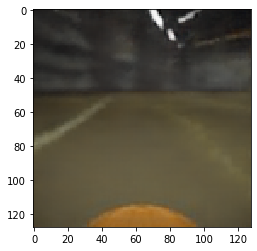

[ 0.29948786  0.83722484 -0.27727258  0.7606055  -0.62256795 -0.04991811
 -0.34511507  0.12378888  0.49893808  0.03942223  0.38364404 -0.13008323
  0.28671557  0.03660395  1.8066847  -0.14463924  0.64924407  0.15681317
 -0.04298906 -0.567158    0.02921003  0.39832288  0.65908694 -0.01252299
  0.44457507  0.5823278   1.246551    0.19850893  0.2712655   0.23010543
 -0.47284704 -1.2027165   0.65388435 -0.07595278 -0.93456566  0.0802439
 -0.6144714   0.2892503   0.44203302 -0.7880729  -0.02181594 -0.08893649
  0.03211052 -0.04900585  0.58139527  1.3493778   0.14500198 -1.5334773
  0.18970075  0.42280704  0.18370865 -0.04673767  0.13812347  0.24883091
  0.28545943  1.2749399  -0.5134921  -0.5978263   0.3919188   0.12032751
 -0.01166259  0.35668486 -0.27125487  0.9652395 ]


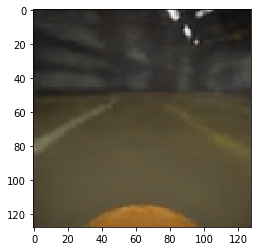

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.0453552  -1.1376717  -0.04598261  0.1657207   0.46234813  0.5678548
  0.34757793  0.22824754 -0.14986283  0.32513744 -0.3118164  -0.08163478
 -0.2352823   0.29262573 -0.9868874  -0.15390024 -0.8223736  -0.21634224
 -0.00769912 -0.7625038  -0.08736365  0.8989307   0.3824582  -0.10117029
  0.23045373  0.7363866  -1.0334706  -0.09937055  0.11731819 -0.31050357
 -0.40808117 -0.61559623  0.22868022 -0.13405994  0.74051255  0.45919296
 -0.24410093  1.095055   -1.826151    0.9152162  -0.94622767 -0.61905676
  0.26680434 -0.3952333   0.03636389  0.3576629   0.17980859  1.0742757
 -0.09207271  0.7248357  -0.67968297 -0.12633191 -0.21705462  0.16048184
  0.30118626  2.2340426  -0.12354442  0.48030645 -1.054324   -0.00430102
  0.08474664  0.12985392 -0.36254412 -0.09738813]


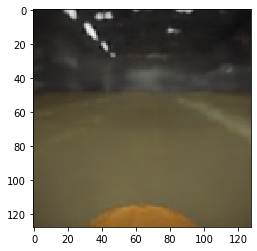

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.3222053   1.0923246  -0.43048674  0.28284785 -0.5867237  -0.24979424
 -0.21441528  0.15958692 -0.01878186 -0.20722236  0.5115212   0.36103866
 -0.5556105   0.2758185   0.8201538  -0.05137002  0.3500911  -0.48600575
  0.41045418 -0.17641863 -0.1758569   0.79465896 -0.25103116  0.05711195
  0.5159497   0.40609744  0.9124814  -0.6453527   0.12431544 -0.08828255
  0.18786816 -0.72376883  0.5269358   0.22043145 -0.55381423 -0.7070848
 -0.3704263   0.51413375 -0.00919673 -0.82515585  0.10451353 -0.63810307
  0.30533472 -0.31555083  0.33784378  0.5520821   0.3171599  -1.3414654
  0.31320888 -0.21332262 -0.17124796  0.30343246  0.03976953  0.14439958
 -0.23492078  0.7872533  -0.96221125 -0.5509137   0.24324545 -0.00820839
 -0.30956012  0.5248819  -0.271759   -0.04264799]


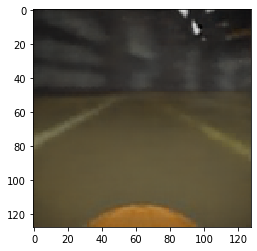

[ 0.27765384  0.3796599  -0.10848704  0.1245763  -0.5960972   0.0649
  0.01402701  0.20224778 -0.18703    -0.01799303  0.36553168 -0.29687032
  0.26588494  0.01915257  0.14346981 -0.2178603   0.710807    0.5309912
 -0.20800464 -0.27153373 -0.05729826  0.34467122 -0.3321448  -0.1506719
  0.1287414   0.06426756  0.23170547 -0.03061903  0.65190303 -0.17382696
  0.12276595 -0.49103624  0.35307246  0.1981901  -0.19167238 -0.9891851
  0.15505509  0.63036025 -0.09183613 -0.23297113 -0.18703493  0.04334138
 -0.03995937  0.28924936 -0.31033313  0.2579336  -0.00603424 -1.4008089
  0.40378037 -0.11923777  0.03749649 -0.07894478  0.26833194 -0.37427038
  0.16960634  0.786998   -0.45303988  0.00337253  0.15720946 -0.09663713
 -0.0142115   0.48304003 -0.08746988 -0.20236431]


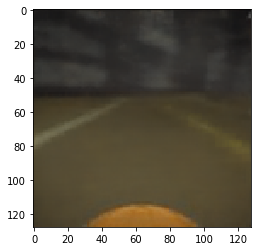

[-0.12525392  0.6955838  -0.1869872  -0.1956557  -0.32055283  0.14247969
  0.33677614  0.02256096 -0.23529091 -0.04264377  0.22025901  0.28332442
 -0.76234925 -0.06007031  0.2837257   0.07985499  0.01432061 -0.42530766
 -0.4904188  -0.0115875  -0.17944975  0.36052674 -0.35160118 -0.01118637
  0.38400513 -0.07607849  0.32025528 -0.5218603  -0.16655414 -0.52012646
 -0.21183147  0.17462268  0.5316098   0.15698317  0.13433528 -0.8918163
  0.3762444   0.66931325 -0.48317745 -0.5534743  -0.20469217 -0.13534349
 -0.13584772  0.17987505 -0.47146666 -0.18530464 -0.01688787 -1.3164432
  0.4716847   0.32343513 -0.2509382   0.03127787  0.5064803   0.35077357
 -0.3850113   1.1012326  -0.12613876  0.40343252 -0.37347567  0.05902194
  0.37990654  0.5580549   0.0637657  -0.4352555 ]


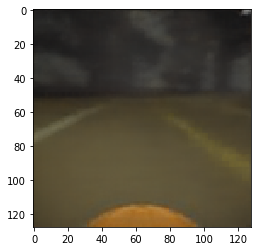

[ 1.4612648e-01  5.1156992e-01  6.4258680e-02 -7.7432677e-02
 -1.0627362e+00  1.1724487e-01 -4.8560542e-01  1.1666250e-01
 -1.7917788e-01  3.3494461e-01 -1.2226100e-01 -1.5549661e-01
 -5.0299007e-01 -2.3680703e-01 -1.0614763e+00 -1.5224344e-01
  3.6600026e-01 -6.9359314e-01 -4.7498831e-01 -2.9692173e-01
  4.0818048e-01 -9.7459316e-02 -4.2088836e-02 -2.2936112e-01
  4.4830695e-01 -7.9805344e-01  5.3138256e-01  9.2926353e-02
  6.7752564e-01 -7.8281069e-01 -1.3593349e-01  3.4084377e-01
  4.7577488e-01  4.7243871e-02  5.5837882e-01 -1.4043252e+00
  1.2283326e+00  8.4692293e-01 -1.0924542e+00 -5.5163052e-02
  4.9762961e-01  4.4779819e-01  9.6310884e-02 -9.1690511e-02
 -5.2437449e-01 -9.9001282e-01 -4.5084798e-01 -1.3917068e+00
  3.8736412e-01 -3.0775410e-01 -1.5289508e-01 -1.0675812e+00
 -8.4112428e-02 -1.7053258e-01  7.6959923e-02  3.9657879e-01
 -1.2676090e-01 -2.3264252e-04 -2.2496609e-01 -1.2079817e-01
 -1.5739106e-02  5.3855532e-01 -1.3444990e-02 -6.1907434e-01]


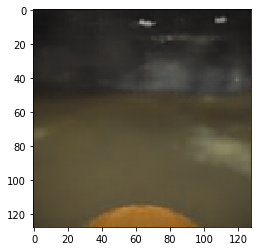

[-0.24500023  0.7264901   0.09618408 -0.57964146 -1.6452098   0.3219981
 -0.7689607   0.01841402 -0.690491   -0.18485826 -0.3093499  -0.15849228
 -0.08503956 -0.25549033 -0.73728955  0.01191494  0.11157265 -0.598691
  0.15978613 -1.0239104   0.37568304 -0.2557919   0.06137884 -0.8566984
  1.1077149   0.07196262  0.06603055  0.22066069  0.42444545 -0.95316595
 -0.03657815  0.67227846  0.7918914   0.0460056   0.556664   -0.79318625
  0.77972925  1.178888   -2.069195    0.02639686  0.6066715   0.24742275
  0.8674908  -0.6061039   0.13470374 -0.6567698  -0.07629491 -0.532176
  0.5251579   0.30561498 -0.6899689   0.33127698 -0.5040596   0.37601182
 -0.12678806  0.28390452  0.6303238  -0.83973086 -0.1774368  -0.11741757
  0.17158556  0.4751317  -0.27209198 -1.2660105 ]


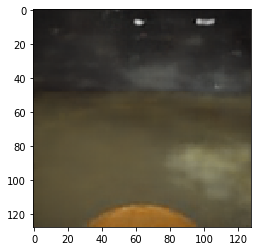

[-0.34218386 -0.65507233  0.34347132 -0.06611487  0.29951397 -0.07619998
 -0.45449734 -0.11736409  0.40928364  0.29423824 -0.32587147 -0.22352931
  0.49338174  0.4545717  -2.724475   -0.4337312   0.9311438   0.9763051
 -0.09633949  0.09589131 -0.29757747 -0.75176704 -0.27035534 -0.06442185
 -0.5235975  -0.42577457 -0.03765801 -0.08582559  0.14329161  0.4575468
  0.56460273  0.871486    0.0833094  -0.22790931  0.35029235 -1.1986696
 -0.08183377 -0.37193987 -0.20870131  0.23341732 -0.8675984  -0.26109675
  0.51120603  0.3360009  -0.45267034  0.03996474  0.1186846   0.5842695
  0.05215915 -0.43482354  0.05463419  0.10557389 -0.28050068  0.4115625
 -0.9095918   0.7722106   0.6004884   0.36011353  0.19131304  0.01551439
  0.49692088 -0.52907735 -0.27025282  0.30479237]


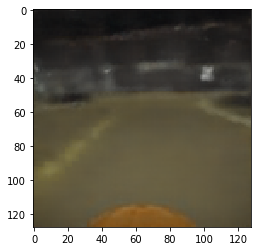

[-0.32534498 -0.43366653 -0.04559218 -0.56999296 -0.67968965 -0.06435479
 -0.93948466  0.3225911  -0.15826224 -0.08834551 -0.23094061 -0.35144037
  0.34009236  0.85140646 -2.4156697  -0.29976535  0.7772402   0.70591867
  0.14995027  0.65990156 -0.13501623 -0.18494183 -0.03164213 -0.2996024
 -0.27847254 -0.6728784   0.20036925 -0.07082628  0.42585075  0.4750356
 -0.44085565  0.59859794 -0.44513744 -0.14281845  0.42046845 -0.9863671
  0.31122282 -0.39742845  0.32497314  0.3346994  -0.78937066  0.04086858
  0.23899442  0.11710766 -0.3600107  -0.20141293 -0.01872974  0.58859956
 -0.0063399  -0.12570646 -0.6631324  -0.10667031 -0.4699219  -0.07123501
 -0.7388199   1.0563568   0.06247835  0.12502518  0.09986986 -0.16002956
  0.43056005 -0.08890173 -0.10543218  0.48355576]


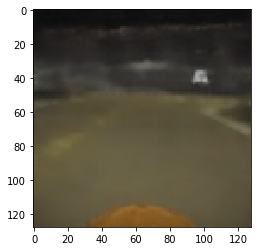

[-0.34273332 -0.5107138  -0.30506644 -0.17334981 -0.4155306   0.22231008
 -0.46276474 -0.02269028 -0.25327826 -0.22467071  0.43953806 -0.05256635
  0.43240649 -0.12637591 -1.0528971   0.14280993  0.00836853 -1.3106171
 -0.5892024   0.7927658   0.01947672 -1.1446774  -0.22065504  0.03854617
  0.47512692  0.5994792   1.0232028  -0.23230134  0.36536118  0.4240025
  0.528555   -0.28760463  0.12797402  0.24021083  0.29265186 -0.6779131
  1.3338752  -0.08753858  0.18632671  1.193721   -1.3462257  -0.07732286
 -0.22007374  0.85027605 -1.0391843  -0.31629652 -0.262811   -0.8035762
 -0.3447652   0.6944588  -0.26534766  0.40936294 -0.36832976 -0.35040423
  1.0029972   0.9400891   0.52948344  0.5899395   0.17205817 -0.37350032
 -0.49195656  0.00648203  0.6208612   0.94677544]


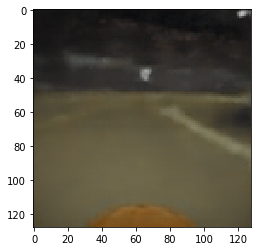

[-0.2213476  -0.7983135  -0.40187865 -0.08946183 -0.53460026 -0.8995377
 -0.5356834  -0.24403152 -0.14951856 -0.42530078  0.49550593 -0.37696522
  0.05233321 -0.9794952  -1.4199487   0.42593223 -0.44265366 -1.6414788
  0.35595134  0.40907985 -0.37365812 -0.46854296 -0.74316037 -0.33882433
  0.34253958  0.36896586  0.8023691  -0.4766748   0.2886551  -0.0656925
  0.0600403  -0.34763426 -0.00868981  0.22631632  0.85584164 -0.641112
  1.7802074   0.04106646  0.27108374  0.9941257  -1.437889   -0.13108933
  0.16977213  0.01235211 -1.4550627  -0.74124366  0.22013044 -0.19210047
 -0.25173536  0.6220965  -0.39382395 -0.1909883  -0.26325196  0.0425031
  1.0742865   0.80931896 -0.00958047  0.90619093  0.37650087 -0.51450187
  0.8804629  -0.20224756  0.2864537   1.1160095 ]


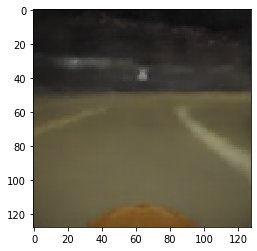

[ 4.67899442e-03  2.81288624e-01 -4.09194082e-02 -5.02671242e-01
 -5.67262411e-01 -4.52035129e-01 -9.85292017e-01  1.53554305e-01
 -3.53541970e-01 -3.29605371e-01 -1.38393149e-01  2.31792271e-01
  6.80397272e-01  7.29153156e-01 -1.88759565e+00 -1.99565649e-01
  9.67673421e-01 -1.45052052e+00  1.90185457e-01  6.66697681e-01
  6.29306436e-01 -4.50364053e-01 -3.81138563e-01 -9.89293978e-02
  1.12321116e-01 -3.59465122e-01  1.69270992e+00  1.67394504e-02
  2.30941102e-01  3.43929380e-01  1.94731653e-01  2.30821282e-01
 -2.06181914e-01 -2.20723525e-02  5.98702490e-01 -7.11917639e-01
  1.48212385e+00 -2.93827087e-01 -9.70125571e-02  6.88935876e-01
  4.78193164e-04  2.88484693e-01 -4.08423692e-01  3.34455431e-01
 -2.02438593e-01 -6.21210098e-01  8.99175882e-01 -7.05981195e-01
 -2.74231613e-01 -7.43429363e-02  9.71338600e-02  6.78669214e-02
 -9.28777635e-01 -1.12951487e-01  5.99051535e-01  4.31424975e-01
 -9.59783792e-02 -4.49500889e-01  8.30549821e-02 -5.32127857e-01
  1.97630301e-01  4.36402

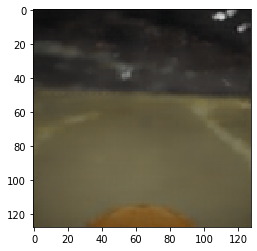

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-4.8386437e-01  4.7559747e-01  1.5939976e-01 -9.4951266e-01
 -1.0860978e+00  1.4053896e-01 -1.0228021e+00 -4.3198323e-01
 -2.2617638e-01 -5.7563150e-01 -4.7331974e-01  3.5355214e-02
  8.2021058e-02 -6.7235267e-01 -5.7453197e-01  4.4357836e-02
  7.3705810e-01 -6.9301254e-01 -7.8718521e-02  8.1610370e-01
  3.8387507e-01 -1.2778696e+00 -7.7892655e-01 -5.5012047e-01
  1.9614108e-01  9.3953833e-02  2.1699882e+00  4.5766860e-01
 -2.0317368e-01  4.5318380e-01 -1.6931444e-04  5.6332660e-01
  1.1992258e-01  3.6293682e-02  1.7047215e-01 -1.5384418e-01
  4.1458407e-01 -3.0197528e-01  6.6317385e-01  7.0792221e-02
 -6.2537926e-01  5.8179903e-01  1.9797277e-02  3.9614034e-01
 -7.7195257e-01  2.6996490e-01 -6.0952455e-02 -1.0034653e+00
  1.7823216e-01  2.2488041e-01  5.7442969e-01 -3.4180361e-01
 -1.9081539e-01  2.7515596e-01  9.0641505e-01  1.4025171e+00
  1.2819775e+00 -2.5309515e-01  8.8285452e-01 -5.5502206e-01
  2.6182830e-01 -1.0640230e-02  2.5642091e-01  1.6345536e+00]


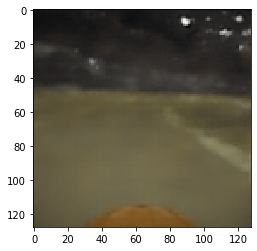

[-0.22862181 -0.9392461  -0.27415133  0.3758326   1.082688    0.43360475
 -0.15331726  0.00467738  0.71176213 -0.490007    0.29931116 -0.2333022
 -0.03643709 -0.1932271  -2.3118305   0.50053394 -0.2115896  -0.7552365
 -0.05492155  0.04980254 -0.7473191  -0.55445856 -0.6339496   0.25226408
 -0.08837157  0.7458993   0.9091835   0.12691182  0.49099177  0.08701153
  0.21234629  0.29563624  0.4037757   0.15985613  0.71960706 -0.6669339
  0.92854303 -1.0575353   0.3849132   0.26739222 -1.8344003  -0.93287927
  0.64855397 -0.06038523 -0.84572244 -0.11019988  0.4457098   1.1625968
 -0.1806684  -0.44994283 -0.48492086  0.1398578  -0.4392935  -0.9224607
 -0.313732    0.76884943  0.02737018  0.8851319   0.4175506  -0.0476953
  0.06852177 -0.6638562  -0.68887275  1.3746445 ]


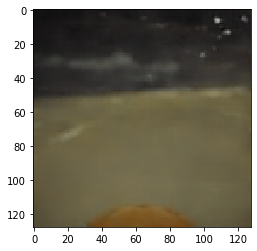

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.43399417 -0.767764    0.82018983  0.53364295 -0.09946641  0.37214845
 -1.2471346  -0.10962835  0.02466005  0.29501703 -0.494546   -0.6030892
  0.0804628  -1.8779088  -1.2088066   0.3035878   0.5731511   0.5061971
 -0.00341275 -0.22136527  0.08155289 -1.5994871  -0.21166092  0.3268635
 -0.0035335   0.824334    0.01890046 -0.06820597  0.3105023  -0.7252761
  0.09473415 -0.8588179   0.79699117  0.08962881  1.307516    2.3450603
 -0.4431403  -0.68334323  0.07681456 -0.28942472  1.4931141  -0.2808351
  1.6566886   0.5539833  -0.07311764  0.3382646  -0.04884513 -0.1254597
  0.23489696 -0.3850485   1.9884552  -0.09735452 -0.22432835 -0.44406796
  1.1377383   1.1974      1.3153404  -0.32563022  0.7600021  -0.13673592
  0.280576   -0.34720728 -0.37785906  1.4497999 ]


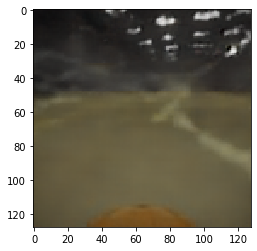

[-0.9534203  -2.0080357  -0.57214487 -0.28786802  0.8398848  -0.32370853
 -0.01114199 -0.39926144 -0.43456495 -0.66109496 -0.2168872   0.629634
 -0.14351785 -1.7706195  -0.5091973   0.6961677  -0.29392618 -0.09583909
 -0.28516683 -0.15318175 -0.9757907   0.14693019 -0.02484394 -0.37221733
 -0.24309368  1.2881073  -0.4582263  -0.16577335 -0.7918085  -1.1578662
 -0.12298242 -1.2802668   0.1479787   0.20397586  1.4972316   2.0164835
  0.31061104 -0.75311685  0.9540498   0.73392266 -1.0441855  -0.42953768
  1.0629696   0.6109992  -1.5597835  -0.22438572  0.5970676   1.0028985
  0.005684   -0.44240624  0.43458214 -0.07355809  0.2934428  -0.2414141
  1.1750079   1.9200428   0.27001694  1.0561885  -0.24510537 -0.223283
 -0.10651303 -0.16873911  0.08208682  1.4629524 ]


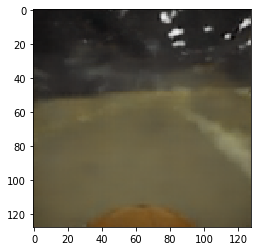

[-0.03477678 -0.06740326 -0.09140343 -0.13446465 -0.4794969   0.30701372
 -0.5091796  -0.2095271   0.22048481  0.21911208  0.59205306  0.09574106
 -0.30007648 -0.08438143 -1.7866218  -0.18220106 -0.6395698   0.13327852
 -0.2827195   0.60155123  0.29887173  0.5982451   0.37088016  0.14221124
  0.11642192 -0.6146726  -0.7331177   0.36243677 -0.09631678  0.11339835
  0.14837685 -0.12551735 -0.4339346   0.0141035   2.216449    1.7815282
  0.11412483 -1.0244938   0.5467116  -1.3153143   2.5218244  -0.32418162
  0.3294819  -0.2553415   0.7835687  -0.02984616 -0.13213862  1.4900172
 -0.12634997  0.10788372 -0.18510859 -0.1490707  -0.19970909 -0.00992303
 -1.0492498   1.1022455  -0.04266546  0.22361167 -0.10351794 -0.01719011
 -0.08424801  0.3973958  -0.36024493  1.9889144 ]


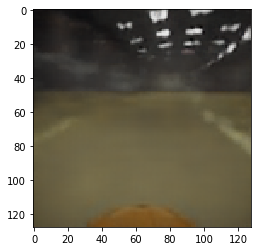

[-0.17077658 -0.55589545  0.09133226 -0.38842136 -0.16532718 -0.04668621
 -0.7656651  -0.08354876  0.14082083  0.06468389 -0.08861649  0.1727164
  0.11653102  0.0105948   1.0978253  -0.21085188  0.02150511 -2.0025098
  0.37941903 -0.31675556 -0.4236774   1.4417844   0.5610521  -0.15305042
  0.3587562   0.56120265 -1.1546487  -0.01555628 -0.26323652 -0.4718365
  0.18655992 -1.9597285   0.42716122 -0.1594883  -0.15428564  1.7669634
 -0.51489633 -0.1844109   0.80446875  0.8357853   1.808037   -0.45869765
 -0.06512189  0.04096543  0.15854028  0.2637189  -0.23692167  0.8254809
 -0.7723013   0.32384372  0.35033926 -0.41388312  0.35180965 -0.25652802
  0.99380916 -2.0312252  -0.25321752 -0.50198066 -0.14687489 -0.7954736
  0.18166369  0.07961934 -0.24840057  0.53407335]


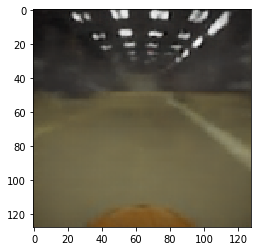

[-0.2416352  -1.1334479  -0.16905005  0.03512583  0.5623662   0.05407546
 -0.7378021  -0.28570887  0.1504196   0.08937837  0.15836418 -0.43917978
 -0.39828295 -0.6423953  -1.3502274   0.08621416  0.1534085  -1.0723829
 -0.28640237 -0.6206228  -0.6365481   1.0901461   0.20810553 -0.10138221
  0.2156025   0.62270427 -1.8941053  -0.18699127  0.15680818 -0.25917462
  0.13695651 -1.7854906   0.41574806 -0.23304592  1.0479896   1.5170819
  0.06435031 -0.24201608  0.1545209   0.32742944  2.4060977  -1.069998
  0.6793477  -0.07186261  0.13825887 -0.4110903  -0.20651698  1.0738527
 -0.5675424   0.06485409  1.0901719   0.02036809 -0.4546889  -0.05159717
  0.43171957 -2.1142995  -0.8400142  -0.00319524 -0.28431264 -0.6010606
  0.10979751 -0.0973013  -0.07201017  0.1404131 ]


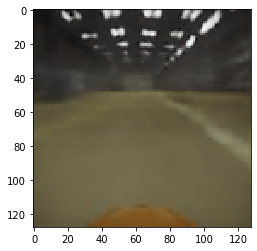

[ 1.8506324e-01 -8.3246440e-01 -1.6513248e-01 -4.6810713e-01
 -7.3243439e-01  3.0800322e-01 -1.4667596e+00 -1.7752606e-01
 -1.4673200e-01  2.2699428e-01 -1.9522235e-01 -4.0942258e-01
 -3.6505233e-02  4.4906784e-02 -2.1923914e+00  3.4132786e-03
  8.3791482e-01  5.6078214e-02 -1.3872987e-01 -1.2818678e-01
  7.1990299e-01 -3.1723124e-01 -5.5418000e-02 -7.3519573e-02
  3.9954638e-01 -1.0191319e+00 -1.4790697e-01  1.2858099e-01
 -8.1927262e-02 -2.5740471e-01 -1.9376896e-01 -5.6930900e-01
  5.7995462e-01 -1.8921494e-03  7.2659051e-01 -4.9002379e-01
  9.4758558e-01 -4.3345177e-01 -6.1130160e-01  5.8010119e-01
  1.9873267e+00  6.9839048e-01  3.6160067e-01  2.5635356e-01
  7.3145801e-01 -5.1072007e-01 -7.1447945e-01  2.5640106e-01
 -4.6783194e-01 -1.4290398e-01  3.5035974e-01  4.5671213e-01
 -6.5526384e-01 -7.3806286e-02  2.6561949e-01 -1.8135988e+00
  1.8832865e-01 -4.8579741e-01 -8.2521990e-02  1.0319713e-01
  1.6491055e-01  4.3888956e-01 -3.3737889e-01 -1.4768289e-01]


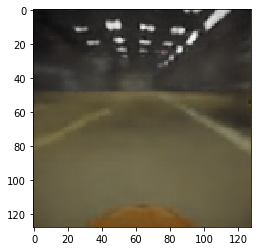

[-0.32893705 -0.96221733 -0.43466544  0.18056376 -0.09050572 -0.01513678
 -0.7451762   0.53069025 -0.09775876  0.3950213   0.24315012 -0.11031541
 -0.05056514 -0.7648303  -3.1002195  -0.03058787  1.0382438   1.7780381
 -0.2668103   0.0577508   0.5244281  -0.93952304  0.04266018  0.34944558
  0.25172025 -1.1218014  -1.2488275   0.00549048  0.07777104  0.20700258
 -0.08230316 -0.95776373  0.55735815 -0.2271564   1.2290877  -1.0169826
  0.760749   -0.33620864 -0.2867418   0.91777325  1.5911386   0.3520858
 -0.08886227  0.72375786  0.7265849  -0.27837864 -0.35609078 -0.13823657
 -0.25550935 -0.05503998  0.8556955   0.18144622  0.03279116  0.20443332
 -0.07238165 -0.8623524   0.38599643  0.21128134  0.18322356  0.06873614
 -0.2651571   0.00524305  0.1277692   0.25932196]


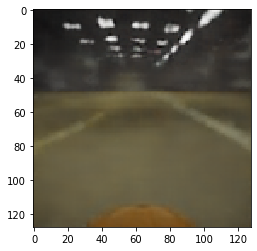

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.13760714 -0.4704652   0.92463994 -0.13248022  0.18165953  0.11698565
 -0.09645139  0.18968296  0.16359149  0.12667121 -0.6126496   0.04336981
  0.48240256 -0.18846974  0.7815561  -0.09101748 -0.5655485  -1.6241205
  0.15240243 -0.3584294  -0.44868806  1.2294466  -0.04745524  0.0464227
  0.7086307  -0.7639189  -0.5466588  -0.27313623  0.02987931  0.01710054
 -0.2770977  -0.64745533 -0.17577122 -0.23313384 -1.2140344  -0.9160447
 -1.2585514  -0.47186628  0.76747495 -0.30944192  0.85222876 -0.09290971
  0.6411281   0.03285674 -0.07509706  0.26315337  0.06592287  1.4176521
 -0.9115521  -0.27808037 -0.8602738   0.5255089   0.4634236   0.06000333
 -0.8664932  -2.1917274   0.5171445   0.7699099  -0.01303236  0.37427023
 -0.3228864  -0.3327663  -0.24790502  0.05874719]


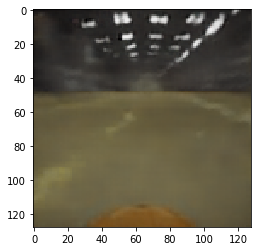

[ 0.06837887 -1.0685835   0.5176132  -0.6034663   0.05490655 -0.08567162
  0.1216836  -0.02146543  0.11821433  0.21662807 -0.28086615 -0.08044886
  0.0242334   0.3259321   1.5622957  -0.22623402 -0.8500354  -1.9486166
 -0.14834106 -0.09209622 -0.29223868  1.5815375  -0.12353103 -0.35424668
  1.2163286  -0.4753242  -1.3910193   0.32539266  0.15481016 -0.24293973
 -0.11639863 -1.4516007  -0.7409214  -0.20858957 -0.98691416  0.36924487
 -0.73868847 -0.34715608  0.47194922 -0.02201663  1.5955348  -0.283771
  0.559789    0.7599196   0.05460877 -0.06961139 -0.05085433  1.4551363
 -1.2417449   0.06909728 -1.4692265   0.02631558  0.07857123 -0.47191817
 -0.5729012  -1.922061    0.44045     1.0960793  -0.82785046  0.18181074
 -0.18581831  0.3700972   0.16497985 -0.1530343 ]


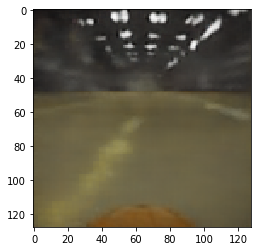

[-1.64641440e-03 -1.27406657e+00  1.00937225e-01 -3.11298728e-01
  8.99193168e-01 -5.97609729e-02  3.18522565e-02  1.86183318e-01
  4.88282502e-01 -9.99597311e-02 -1.72356114e-01 -6.74720034e-02
  1.33716092e-01 -1.56544298e-01  4.66441244e-01 -8.31879303e-03
  3.15204933e-02 -1.37309730e+00  1.36758298e-01 -1.01344749e-01
 -8.07250142e-01  1.52890992e+00 -1.40040845e-01 -3.00965756e-02
  3.49665552e-01 -1.81415647e-01 -1.74169743e+00  2.93132141e-02
 -2.18503892e-01 -1.94240659e-01  3.76819849e-01 -1.78811955e+00
 -3.57127309e-01 -2.17527375e-01 -8.21176395e-02  1.03623843e+00
 -7.10578442e-01 -7.91927814e-01  1.05435848e+00 -2.23443396e-02
  2.16528249e+00 -7.99443364e-01  4.69896287e-01  4.68079448e-01
 -2.36831069e-01  2.69640014e-02  1.53463364e-01  1.53233576e+00
 -9.05932784e-01  4.21058573e-02  1.74639344e-01  1.61784962e-01
  2.71885902e-01 -9.09565091e-02 -1.79283947e-01 -2.35243249e+00
 -2.71379948e-01  8.11416805e-01 -6.46459222e-01 -2.09631547e-01
 -8.22801217e-02  1.17948

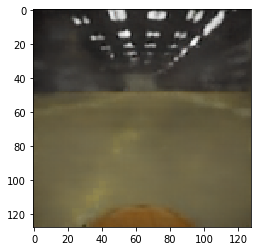

[-0.28075886 -0.5427672   0.36635658  0.05082559  0.7229063   0.46935433
 -0.11316258 -0.22578554  0.33952752 -0.3009113  -0.36148039 -0.08342071
 -0.5212009   0.02099697  1.3960931   0.09959009  0.5313668  -1.5294452
  0.12748244 -0.31652468 -0.4480732   1.1096087  -0.17364208  0.3387956
  0.04521945  0.28816766 -0.41466385 -0.23775259  0.2562672  -0.44535452
  0.09733593 -1.547819    0.46194786  0.01091832 -1.1369438   0.37755907
 -1.1107403  -0.6177389   1.1211911   1.1514646   0.27850997 -0.08581069
 -0.11164884  0.21883819  0.1453951   0.8189196  -0.6061869   1.0844753
 -0.8630636  -0.27286536  0.13167596 -0.1388964   1.0958295  -0.20809527
  0.7394432  -1.9789394   0.4056877  -0.1378657   0.0846404  -0.15038809
  0.15275732 -0.3080301   0.39724916  0.6561912 ]


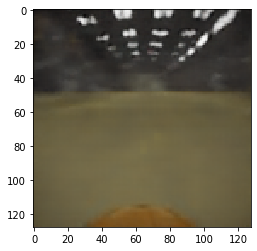

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.16285416  0.29599336 -0.13522801 -0.38421005 -0.7151426   0.04647345
 -1.3579494   0.06535283 -0.13061675 -0.17428468 -0.26154196  0.2789993
  0.40044683  0.8720626  -0.0086394   0.08546339  0.1754141  -1.6171203
  0.58023655  0.01549104 -0.06115327  1.0272865   0.08176893  0.22968704
  0.22547078 -0.21902904 -0.4648411   0.19738178  0.05342328  0.15014891
  0.29111874 -0.4132358   0.82518196 -0.00329815 -0.32421115  0.688459
 -0.98639005 -0.5514432   0.40146425  0.36654308  2.0371997   0.1257966
 -0.2922657  -0.4799323   1.2912745   0.86143917  0.06694258  1.4256443
 -0.95288706  0.17248136 -0.22320604  0.31849584  0.29702365 -0.16079414
 -0.05780146 -2.4660728   0.4922752  -1.2185088   0.05811753 -0.08770403
 -0.40261522 -0.05225233 -0.14958425  0.51171786]


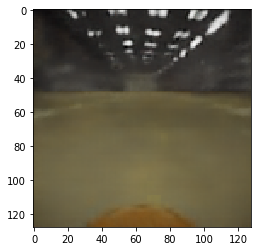

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 1.62884384e-01 -1.17413843e+00  2.37987041e-01  2.52146393e-01
  2.23385572e-01 -3.95623416e-01 -1.16713750e+00  1.52081341e-01
 -1.05750218e-01 -6.36021048e-03 -1.82455882e-01 -1.19205415e-01
 -2.74517294e-02 -1.16506052e+00 -3.32745290e+00  1.52415752e-01
  3.23126376e-01  5.50779365e-02  1.14328757e-01 -9.63356376e-01
  2.36907378e-01 -6.04638100e-01 -1.24955565e-01 -7.70708248e-02
  2.45508343e-01 -3.75246882e-01 -1.65902734e-01  1.53350800e-01
 -8.83480608e-02 -2.39944100e-01 -4.82793093e-01 -1.08200964e-03
  1.11420667e+00  1.28361434e-01  1.17700398e+00 -1.06174028e+00
  9.60290194e-01 -4.74828839e-01 -9.20909703e-01  6.29327655e-01
  9.84276235e-01  1.12156607e-01  7.55957961e-01 -2.28929058e-01
  3.24939936e-03 -2.97563821e-01 -2.92949587e-01  1.19712448e+00
 -4.58257467e-01 -1.47695586e-01  9.65719163e-01  2.01289430e-01
 -7.27435887e-01  4.18887893e-03  3.73802125e-01 -2.08960414e+00
  5.90775311e-01  9.08243507e-02  5.71695387e-01 -1.25503510e-01
 -2.47437835e-01 -6.06256

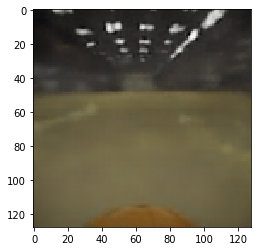

[-0.3165187  -1.6687034   0.46244007  0.16369848  0.72077185 -0.3652062
 -0.5193488  -0.01424332 -0.15956256 -0.41276366 -0.3249068  -0.12769836
 -0.48648942 -1.0230137  -1.3788466   0.34962994 -0.02440165 -0.819231
 -0.3389836  -0.72272545 -1.0235333   0.7426802   0.11190662  0.03739827
  0.17809974  0.02789567 -0.24475192  0.2579637   0.09034239 -0.4788707
 -0.17007764 -1.0675102   0.20499499  0.04333922 -0.05332828 -1.4324361
  0.40785342 -0.5714752   0.7170578   0.98229164 -0.8451583  -0.2288109
  0.6905913  -0.26645726 -1.4096847  -0.32208282  0.81736124  1.5211414
 -0.67446     0.00642546  0.08116324  0.2900929  -0.26245937 -0.09590854
  0.5378738  -1.9117384  -0.64488935  0.90998644  0.47251928 -0.35795325
 -0.20163247 -0.80792487 -0.034716    0.34889853]


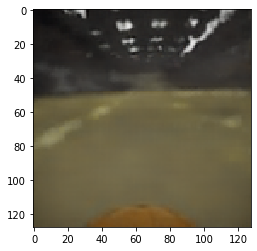

[ 0.6206126  -0.4550013   0.07205568  0.9107903   0.62581325  0.26758417
 -0.6662256  -0.15197863  0.23706527  0.6048883   0.16953737 -0.29224008
  0.13066088 -0.30345938 -1.5684096  -0.19087544 -0.01325267 -1.6329237
 -0.01427768 -0.83564216 -0.22564755  0.4418521   0.26245743  0.3208673
 -1.0522666  -0.17012681  1.8512813  -0.18002985 -0.1325126  -0.42342058
 -0.02540866  0.40136984  0.5060283  -0.18892331  0.3769925  -0.4999246
  0.18921304 -1.1790178   1.0125135  -0.23805605 -0.89324284  0.15008992
 -0.5140562  -0.57254994 -0.5685487   0.05218533  0.33915505  0.6932249
 -0.378263    0.01885911  0.3858697   0.01341723 -0.04403342 -0.22780575
 -0.10509054  0.07210489  0.06725775  0.17613846  0.6093788   0.3379328
 -0.1478119  -0.8690988   0.07595451  2.0907469 ]


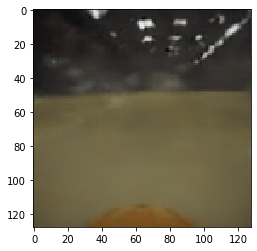

[-0.14941776  0.39999208  0.6109912   0.12629236 -0.3577909   0.08529465
 -0.21451795  0.1610354  -0.2598934  -0.20269315 -0.16321284 -0.02714907
 -0.06806381 -1.2708067   0.5897908  -0.1311704  -0.6155092  -1.9229391
 -0.3181194  -0.60060036 -0.03332915  0.7246083  -0.12204655  0.33470535
  0.9385839  -0.823734    1.2778744  -0.05493303  0.09328241 -0.8168492
 -0.16508184 -0.49600202  0.0824233   0.12425343 -1.0553614  -2.4131103
 -0.30047017 -0.38915408  1.1538755   0.18449782 -0.5330093   0.7989914
  0.25320488 -0.47945943 -0.18500891 -0.2759536  -0.39329782  0.33892518
 -0.5111249   0.09788661 -0.93565154 -0.34298593  0.73563606  0.17935742
 -0.4032966  -1.5245199   0.2849376   0.4493357   0.7389674   0.5926799
  0.06645967 -0.32314056  0.15913433  0.75327444]


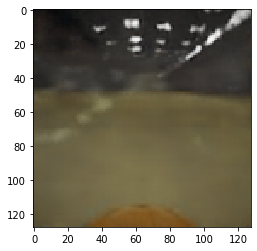

[-2.5783008e-01 -1.0210655e+00  6.0911987e-02  2.5939265e-01
  8.4473360e-01 -6.9260269e-01  2.5203230e-02 -2.0451145e-01
 -4.0077627e-01 -2.2270709e-01  2.4329929e-01 -1.7084652e-01
 -3.1352893e-02 -3.5074848e-01  2.4611190e-01  4.6486378e-02
  3.2802770e-01 -1.2916626e+00 -1.0295437e-01 -1.1227932e-01
 -6.9201422e-01  1.6595273e+00  7.0489787e-02  2.1861047e-01
 -4.9310908e-01 -1.2235901e-01 -1.9515237e-01  4.1472203e-01
  1.3710862e-01 -6.1658472e-01 -3.2192501e-01 -1.4896058e+00
 -9.3885630e-02  1.3264143e-01 -1.5811898e-01 -1.9357243e-01
 -3.2898977e-02 -8.1711221e-01  1.6630654e+00  1.1481388e+00
 -3.9080316e-01 -3.2357490e-03 -5.4826117e-01 -2.1594045e-01
 -7.4117428e-01  1.8685636e-01  7.7312112e-02  1.1923440e+00
 -6.5920484e-01 -4.7419271e-01  7.1705878e-04  2.3674311e-01
  8.7240851e-01  4.2709094e-03  9.8322189e-01 -1.2305247e+00
 -7.5496399e-01  5.5023968e-01  2.5523257e-01 -4.8725516e-01
 -1.7912725e-01 -4.8011947e-01  2.5931364e-01  1.3237898e+00]


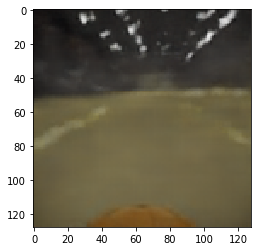

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 5.5618878e-02  3.6887705e-01  1.1267679e-01 -4.9558753e-01
 -1.4319899e+00 -3.3466154e-01 -1.1088294e+00 -3.2802221e-01
 -6.6068363e-01  5.8739774e-02  3.3152737e-02 -1.1189240e-01
 -2.1490064e-01 -1.0881721e+00 -1.7933750e+00  2.7544051e-04
  7.0353493e-02  4.9605769e-01  2.0254934e-01  4.8769921e-01
  7.0313686e-01 -9.2630796e-02  6.8541512e-02 -1.3855189e-01
  7.6229103e-02 -1.5573758e+00  8.7299928e-02 -3.2968274e-01
 -4.2673826e-02 -8.9245707e-02 -6.6650838e-02  4.3861032e-01
  3.5820070e-01 -3.8134210e-02  1.6384912e+00  2.0109470e-01
  1.8564022e-01 -9.4961774e-01  9.5214558e-01 -9.0199298e-01
  2.4550378e+00  8.1778574e-01 -6.7786813e-02 -2.3125328e-01
  4.9597299e-01  9.7877927e-02  3.5223845e-02  6.9081420e-01
 -5.5176284e-02  1.7056729e-01  5.5603874e-01 -5.1320338e-01
  6.6178966e-01  2.6804781e-01 -5.0319320e-01 -5.4964328e-01
  9.7228527e-01 -1.0551065e-01  1.0584741e+00 -1.6601850e-01
  2.0754156e-01  2.3290157e-02  1.4366698e-01  1.6716669e+00]


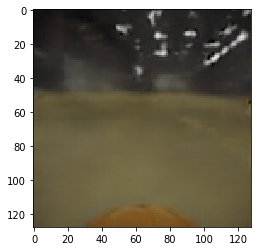

[ 0.23131788  0.506408    0.04226489  0.43025857  0.00398894 -0.2468436
 -0.387872    0.17056885  0.210264    0.31740177  0.3308919  -0.10100733
 -0.06706299 -0.7646923   0.6591733   0.42712814 -0.22089222 -1.5433002
  0.1364842  -0.643718    0.06204099  1.6712444   0.18786101  0.2733849
 -0.32575294 -0.7638604   1.078799   -0.28171697  0.38292682 -1.2190707
 -0.6486243  -0.5559898   0.2976773   0.02226735  0.15441905 -0.19669062
 -0.1116709  -1.17907     1.9363488  -0.31139493  0.5431293   0.8438223
 -0.8866545  -0.84616995  0.14599447 -0.10405538  0.2552911   0.5792048
 -0.26514238 -0.41895536 -0.2030619   0.26202312  1.1130741   0.07149095
 -0.09638945 -0.84704    -0.36556685 -0.11897079  0.51432693  0.2280452
 -0.10758363 -0.38633275 -0.05182235  1.9956497 ]


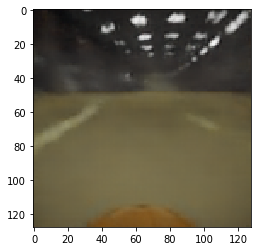

[-0.06574377 -0.5844885  -0.600834    0.31926218  1.4186196   0.08247469
  0.42880538 -0.37930474 -0.01980277 -0.51584804  0.2024251  -0.12798965
 -0.3019091  -1.0881556  -0.89434654  0.26149362 -0.2960881  -0.992488
 -0.03533653 -0.43558457 -1.2549707   1.1420507   0.11803333 -0.17892323
 -0.88344467  0.24601479 -0.20351438  0.01230175  0.03542659 -0.5982845
  0.28727657  0.17035533  0.3090607  -0.08414931  1.3843124   1.0213265
 -0.02185745 -1.5832886   1.9534525  -0.87384105 -0.06467383 -1.0479298
  0.31336457 -0.42257932 -0.98194337 -0.02729901 -0.13189512  1.9134693
  0.00302098  0.19598195  0.238622    0.2249676   1.0494475   0.21849106
 -0.7502913  -0.0715039  -0.14812267  0.9638074   0.26850113 -0.12613474
 -0.16641027 -0.78908205 -0.01378314  2.1359499 ]


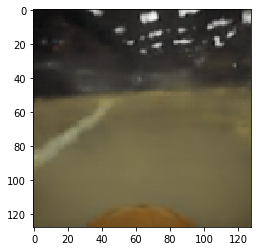

[-0.00281501 -0.24400708  0.4004796  -0.02786248 -0.60143     0.27165535
 -0.71969813 -0.40955457 -0.01200641 -0.00917602 -0.49441803  0.21866836
 -0.36501604  0.2581942  -0.4283075  -0.35095128  1.533302    1.3706045
  0.10278995 -0.1296156   0.76821196 -0.2649791   0.15611805 -0.2682548
 -0.67705536 -0.35139528  1.2475713   0.0946424  -0.30177408  0.10561377
  0.2028111  -0.12667067 -0.20891544 -0.01714029  0.24241519  0.920448
 -0.35019886 -0.5166944   0.35162702  0.16905463  0.0705939   1.2165092
 -0.4669969   0.6955234   0.30077335  1.2100523  -0.11283989 -0.01518544
 -0.09160472 -0.16384166  0.6577242  -0.16300523 -0.19960287 -0.44970286
  0.88540673  2.194806    1.0788943  -0.72019666  0.34255072  0.27474993
  0.09456956  0.2351231  -0.01425458  2.207328  ]


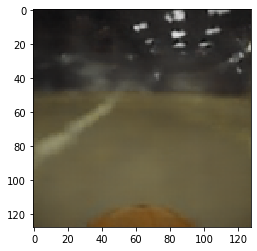

[-0.09450116  0.7271705   0.08753368 -0.22063312  0.22591393 -0.5204699
  0.6085926  -0.28894666  0.28416213 -0.43950513 -0.07724096 -0.11836147
 -0.15174556 -0.826403   -0.7994543   0.2799912  -0.29059175  0.6991567
  1.1290894  -0.50385654 -0.34435943  0.9826766   0.32165802  0.01450449
  0.704638   -0.17958124 -0.7631824   0.2874654   0.15164922 -0.89111024
  0.2627666   0.31221735  0.28884733  0.4724945   0.7063716  -1.4608322
 -0.84984773  0.68484205 -1.524773   -1.415244    0.6461427  -0.41382378
  0.56422323 -0.39161462 -0.10471121 -0.13983968 -0.1922057  -0.2682042
  0.6694762   0.41881496 -0.10413451 -0.01724539  0.27492034 -0.27343363
 -1.2976072   0.89531845  0.21595074  0.19040021 -0.07929508  0.19304146
  0.33191988  0.44320512 -0.07177705 -1.6716942 ]


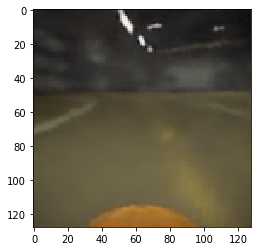

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.35460904  0.51556534  0.01247151 -0.05918783 -0.25920278 -0.13821647
 -0.78907865  0.18365444 -0.16037658  0.0323873   0.07894138  0.15168485
 -0.35836023 -0.13982211 -2.698156    0.1357203  -0.9968614  -0.8384292
 -0.03283968  0.00888788  0.2972552   0.5214408   0.04859954 -0.04392041
  0.333533   -0.8280732   0.40099457 -0.30911198 -0.36222255  1.0721395
  0.14732766  1.136908    0.7599325  -0.1372526   1.0864571  -0.9245262
 -0.19849712 -0.56979793 -0.15394962 -0.9490257   0.9199464  -0.6656451
  0.28031996 -1.5732516   0.8743802   0.55388594  0.04870164  2.2147183
 -0.3514535  -0.1171274  -0.48208022 -0.14927605 -0.08982156  0.26280326
 -1.5705951  -0.96672964  0.33426085 -0.03248452  0.89700323 -0.15451175
  0.14756802 -0.68182194  0.20690893  1.2695132 ]


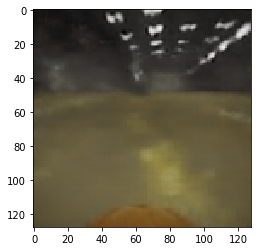

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.13590384  0.2795252   0.52122676 -0.5390849  -0.72188175 -0.09023762
 -0.9300428  -0.07220643 -0.07367814 -0.28972036 -0.726056    0.01679592
 -0.4885217   0.2120334   0.08886157 -0.16964768  0.9596845  -1.0118217
 -0.01502001  0.28605595  0.2295553   0.3821774  -0.61706936  0.44925612
  0.56956255 -0.98355794  0.29826647 -0.5312357   0.24532297 -0.18746439
  0.5658788  -1.0567589  -0.08378635 -0.00917328 -1.1072735  -1.1423844
 -0.612666   -0.11102396  0.648029    0.46463838  1.450848    0.7897836
  0.05280165  0.44894174  0.5473928  -0.18012913 -0.08755141 -0.42163846
 -0.743061    0.51509273  0.01348667  0.13963173  0.08160865  0.12294607
  0.05764025 -1.9062221   0.10071813 -0.61722416 -0.03005248  0.41296667
 -0.4995228   0.5042015   0.13285248 -0.09668928]


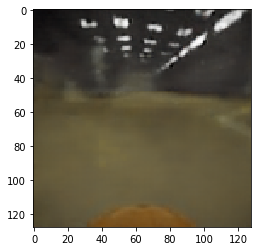

[ 0.5327808  -0.846332   -0.2832118   0.5803157   1.2524657  -0.20904253
  1.2513522   0.34979331 -0.48324108  0.22167923  0.22367528  0.27574968
 -0.06234679 -0.22557539 -2.3604045  -0.53948706 -0.5148061  -0.8509102
 -0.16995342 -0.9666976   0.007697    0.4354112  -0.20281564  0.10735886
  0.15078971  0.10467897 -1.4073172  -0.50939214 -0.04142137  0.79941297
 -0.14102016 -0.14589068 -0.38418823 -0.4043719   0.513709   -1.2060424
 -0.26802668  0.9440742  -1.9088957   1.0872346  -0.3608976  -0.8623429
 -0.873037   -0.26225674  0.02598623 -0.02237294  0.06284022  1.0360112
 -0.70203424 -0.19377403 -0.01360378  0.1601402  -0.08877938 -0.06134304
 -0.48510686  0.37596297  0.7366898   1.1659542  -0.71592885  0.45822468
 -0.65179455 -0.4685577   0.01825875  0.0641142 ]


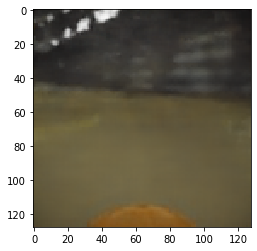

[-0.16674973  0.4464207  -0.25088316 -0.16833371  1.5212238   0.25519407
  0.79481286  0.00521184  0.39658308 -0.65464306  0.30642375  0.24008664
  0.14220259  0.32520598 -1.4414402   0.12302423  0.35576698 -0.20278598
  0.3319056   0.5130968  -0.27065608  0.10989814 -0.03704651  0.30545643
  0.02446599  0.04204654  1.2686185   0.5659426   0.04319973  0.5323276
  0.53554684  0.50792825 -0.11047854  0.05851418  0.6045475  -0.9937311
  0.52977115 -0.6588319   0.04857577 -0.7424449  -0.77274454 -0.7787732
 -0.7832347   0.55918556 -0.24774592  0.09024152 -0.17422017 -0.42192888
  0.1280901  -0.12722124  0.3796949   0.36348882 -0.2024414  -0.07576031
 -0.7686178   1.5502825  -0.27251697  0.71010643 -0.18644206 -0.1078525
 -0.65617436  0.2602513  -0.01400676  1.0937039 ]


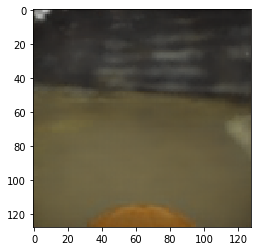

[ 0.22824079  1.1820368  -0.11688924  0.05220132  0.2361814   0.46107295
  0.14325202 -0.01786884  0.14390752  0.20367932  0.22974879  0.05839194
 -0.03621707  0.37768665 -1.3343235  -0.19777685 -0.63129145 -1.0232474
  0.1383574   0.33414292  0.24938741  0.57031333  0.03749149  0.31262085
  0.30076814 -0.5141464   0.97703695 -0.1193552  -0.07822075  0.5875658
  0.26361847  0.8560825   0.01641576 -0.07503915  0.91758823 -0.6624231
  0.12019346 -0.15992099 -0.4560124  -1.3911647   0.68378985 -0.56042224
 -0.5884172  -0.60357964  0.53319156  0.01099102 -0.28943083 -0.02317464
  0.0403052  -0.10273877 -0.21685855  0.04103098 -0.21602078  0.21462992
 -1.3430924   1.1552167  -0.10271037  0.2648326  -0.1760249   0.15453306
  0.6410777   0.32264706 -0.1515939   0.90051967]


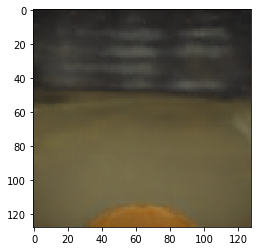

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.14828196  0.6543531   0.4739553  -0.29208     0.16977005  0.1304393
  0.80273163  0.13350627  0.49314213 -0.5993471  -0.17115244 -0.30320305
 -0.02309677 -0.605576   -0.5094873  -0.08995269  0.09805211  0.9027747
  0.297449   -0.9045467  -0.2214658   0.8924196   0.0837517  -0.27294797
  0.15256621 -0.06307997 -0.05007715  0.09899238 -0.16805208 -1.4236068
 -0.5318886   1.0156765   0.16606298  0.29080835  1.2950783  -0.24247457
 -0.14925367  0.4670609  -1.5830775  -1.4144475   0.33355606  0.24443695
 -0.11416391  0.02916978 -0.49169585 -0.15679422 -0.3490818  -0.3901085
  0.89156544  0.02303557  0.33553192 -0.10235651  0.13448368  0.27211952
 -0.747474    2.3170886   0.41937816  0.26497725 -0.40011376  0.31534794
  0.3135759   0.6365694  -0.28959054 -0.26265675]


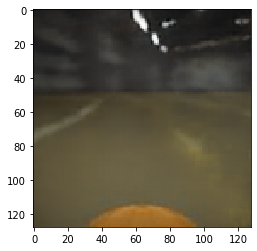

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.18385272  0.6768911  -0.10350341 -0.10238563 -0.07983802  0.22341166
  0.72240186 -0.17284892  0.2581386  -0.19309124  0.29261628  0.11641947
  0.2619451   0.22466932 -0.02219125  0.22955701 -0.14656454  0.8120705
 -0.22287187  0.18820739 -0.07282565  1.7290759  -0.05274522  0.33328527
  0.38634363 -0.4639184  -1.3307012  -0.08618663  0.22729644 -1.1239104
  0.32312763 -0.46970898 -0.16604118  0.2827953   0.8808626  -0.08019409
 -0.9086656   0.7437051  -1.261972   -1.1072642   1.2895607  -0.3444567
 -0.19958146 -0.02571137  0.64698106  0.10498865 -0.1079238  -0.47776157
  0.55888736  0.03513463 -0.5688994   0.14522316  0.6916748   0.06462437
 -0.8701123   2.0614512  -0.46418047  0.08190558 -0.59468514  0.16923606
  0.33863086  1.0604055   0.47004116 -0.95859206]


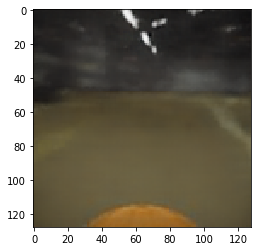

[ 0.2457794   0.50541645 -0.11903553 -0.2724178  -0.13334519  0.3599383
  0.5846546  -0.14119324  0.373317   -0.12900208  0.15770914 -0.0281838
 -0.21186496 -0.16718943  0.5031773   0.32587752 -0.82591426 -0.02766569
 -0.13623418 -0.05136406 -0.28474298  2.0432787  -0.3387938  -0.11261906
  1.1205627  -0.78212357 -1.4741122   0.12606123 -0.6818833  -0.78569126
  0.79630816 -0.6268891   0.00212682  0.42626038  0.32003206 -1.217839
 -0.7774318   0.8959572  -1.2556167  -0.9963271   1.0090524  -0.6650717
  0.20902717 -0.42294696  0.46499684  0.06101054  0.01718182 -0.03274472
  0.27400553  0.04477902 -1.2099406   0.25951883  0.6866215  -0.09332473
 -1.1657187   0.57427484 -0.62616587  0.33352774 -0.45868862 -0.15966211
 -0.23032065  0.61363715 -0.12707889 -1.5132279 ]


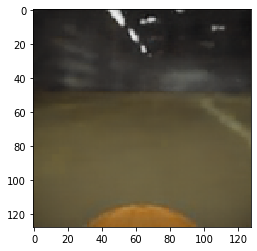

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.32479894 -0.17368162  0.12085006  0.11639183 -0.24101391  0.08840553
  0.03687008 -0.29650277  0.06158543  0.022089    0.15078658  0.36608043
 -0.19530281  0.13187368 -1.2282344   0.09672685 -0.22044864  0.81357586
  0.12359301 -0.49289268 -0.01610487  0.8451075  -0.17229377  0.04268251
  0.89101315  0.22149777 -1.8589724  -0.46526322  0.15762405 -0.29600894
 -0.21537262 -0.8311142   0.08629515  0.00306433  1.0391475  -0.3076527
 -0.26439667  0.97294015 -1.8720883   0.5460349   0.59225327 -0.53266615
 -0.04992124 -0.25212622  0.77410465  0.24013695 -0.2720956   0.6212268
  0.197009   -0.54333615 -0.5681637   0.03785021 -0.340008   -0.03736504
 -0.29073912  1.301598   -0.22258827 -0.26575625 -0.43584055 -0.3954574
  0.1789386   0.17107518 -0.36000144 -0.5912214 ]


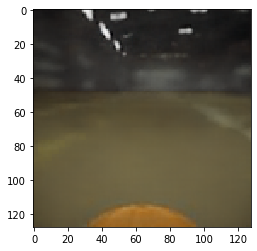

[-7.44864345e-04 -4.12420571e-01  1.17339253e-01  1.82313118e-02
 -6.04059279e-01  3.50202680e-01 -1.77804217e-01  6.24306127e-02
  2.09833756e-02  2.44983807e-02  2.37612166e-02 -1.02182820e-01
  2.70203818e-02  1.20459819e+00 -1.02995420e+00  7.43270218e-02
  3.40382487e-01  1.12307616e-01 -5.04987016e-02 -6.48597330e-02
  8.02411020e-01  1.48873538e-01  2.39347026e-01  2.33296171e-01
  3.03712636e-01  3.32375050e-01 -5.91531754e-01  3.85040909e-01
 -2.27874294e-02 -3.97923231e-01 -6.71102405e-02 -4.96195138e-01
 -4.69759591e-02  1.06781855e-01  5.63454509e-01  6.19902074e-01
  2.24340841e-01  1.13795626e+00 -2.23887634e+00  1.05609059e+00
  2.87965566e-01  1.70071602e-01  1.70400754e-01  1.19591258e-01
  8.25048208e-01  2.70257801e-01  3.76600176e-01  1.36616156e-01
 -8.21924433e-02  3.31396520e-01 -7.66151309e-01 -2.46916980e-01
 -4.82769996e-01  2.54372448e-01  7.38389075e-01  2.39120841e+00
  2.15833560e-01 -3.83831501e-01 -1.02700353e+00  1.23009741e-01
 -8.80628303e-02  1.00601

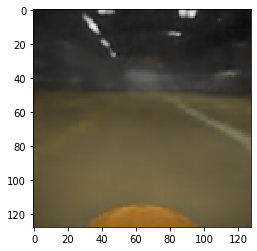

[ 0.01134636 -0.4845619  -0.18476705  0.26395103  0.4434636  -0.05757904
 -0.23368311 -0.08918914  0.25743157  0.73329777 -0.13286993  0.02313593
 -0.36937755  0.4024158   0.40497032 -0.19028047 -0.48549667 -1.4453954
 -0.24674603  0.30811116 -0.14861463 -0.33958057  0.02949099  0.31588784
  0.01912074  0.8536743   0.9103276   0.41353452  0.12465064  0.28173292
  0.5686117  -0.64968723  0.27304453 -0.25053167  0.26855057  1.6208193
 -0.20937194 -0.32823122  0.21525729 -0.1892182  -0.61853284 -0.92954636
  0.07677446  0.6649186  -0.2894626   0.47450498 -0.7469202  -0.46583977
 -0.19612984 -0.03436529  0.14440359  0.14658938 -0.15062866  0.11341543
  0.3062622   2.4436378   0.27682617  0.3146542  -0.5373261  -0.12536196
 -0.30207074  0.05733982 -0.34371895  1.5451045 ]


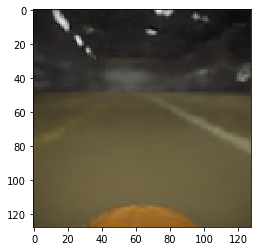

[-0.0648075  -1.1555042  -0.18530661  0.2188322   0.09338857 -0.09858954
 -0.6526053   0.32682374  0.03044397  0.7269267  -0.15267466 -0.29520118
  0.12603857  0.6766502  -0.6675146  -0.32126713 -0.619521   -1.4905387
  0.60434663  0.05380935  0.3041636  -0.25744274 -0.39973944  0.12022261
  0.0132659   0.8105835   1.135068    0.22926317 -0.0463995   0.18661852
  0.45998955 -0.4777215   0.5002788  -0.09828892  0.16923723  0.8134951
  0.39096668  0.1421525  -0.63797486  0.6218517  -1.3560894  -0.4075414
  0.7254439   0.03498421 -0.22825001  0.36515236 -0.31830412  0.232871
 -0.3551725  -0.6681783  -0.6076279   0.05858582 -0.6238081  -0.4054014
  0.83362484  2.1020126   0.08299548  0.25668257 -0.48073483 -0.05169669
  0.521992    0.17237315  0.15207373  0.7981259 ]


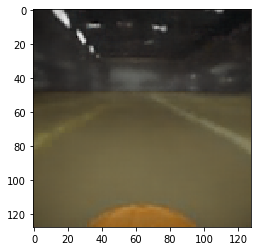

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.41841608 -0.86793065 -0.11715161  0.13145314  0.46991307 -0.00591146
 -0.45611924 -0.26297987  0.22920012  0.80082023 -0.14329356  0.04821968
  0.17215843  0.60949486 -0.387552   -0.2509119  -0.67735225 -1.8303995
  0.58366406  0.00530231  0.11375634 -0.28540084 -0.66818875  0.12193647
  0.17344905  0.6463207   1.5758165   0.06284367  0.06995333  0.28413036
  0.5609305  -0.2597957   0.28634405 -0.26195532 -0.10044429  0.21166436
  0.31920767 -0.05197307 -0.5177459   0.01281413 -1.5403292  -0.5450989
  0.6057472   0.09531632 -0.38046205  0.09785337 -0.48983908 -0.25342855
 -0.21950077  0.71291614 -0.47939795  0.4079718  -0.73854274  0.40737706
  0.19617428  2.0926828  -0.09349319  0.557199   -0.58661187  0.13557427
  0.7720344   0.19643651 -0.05558763  0.6690157 ]


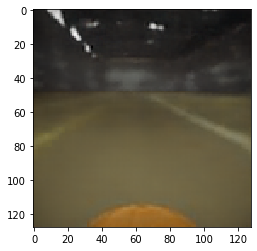

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 1.7032596e-01 -8.0871958e-01 -2.0991844e-01 -1.4840428e-02
  6.9838351e-01  2.0873713e-01  4.7414932e-02 -8.4053338e-02
  2.7867660e-02  7.1912658e-01 -2.3603906e-01  1.5437089e-01
  3.9190263e-02  1.2690832e-01  4.9988928e-01  9.9276505e-02
 -7.8833061e-01 -1.4106276e+00  1.3638523e-01 -1.2420248e-01
 -1.8262257e-01 -3.4506202e-02 -1.3250270e-01  6.5192521e-02
  5.3983861e-01  7.9546696e-01  1.0938932e+00 -9.7131729e-04
  5.6115830e-01 -4.3072235e-02  2.0157661e-02 -5.7748854e-01
  3.6153287e-01 -3.2459769e-01 -2.3292471e-01  1.9754246e-01
 -1.4366353e-01  1.4070991e-01 -4.0290847e-01 -2.2692738e-01
 -1.6286598e+00 -6.2583560e-01  5.8439791e-01  2.9243261e-01
 -4.8958310e-01  8.7842479e-02  6.2249476e-01 -5.5763495e-01
  4.6607539e-02  2.7196091e-01 -4.9054998e-01 -2.4668936e-01
 -2.8548327e-01  2.9306096e-01 -1.6837722e-01  2.5837564e+00
 -5.7421144e-02  9.0976518e-01 -8.5180420e-01  2.3538053e-01
  3.3531359e-01  3.1472597e-01  1.6743581e-01  4.5164081e-01]


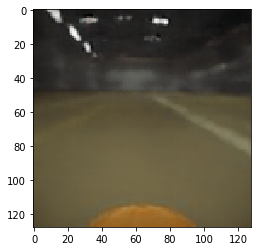

[-0.13637778 -1.001175   -0.461392   -0.01293858  0.4364033   0.31787398
  0.11975313  0.06240769  0.15350077  0.560989   -0.3177104   0.34362018
  0.12510513  0.13486694  0.83777356  0.01628741 -0.99421954 -1.3196812
 -0.457558   -0.14933684 -0.31772995  0.5355523   0.28349486 -0.22823629
  0.4316847   0.8310299   0.3982506  -0.13258211  0.39282787 -0.20178683
  0.14984424 -0.6893327   0.44407526 -0.39275163 -0.01106504  0.9332462
 -0.28746974  0.3593096  -0.45284307  0.04957164 -1.5340514  -0.6611269
  0.57499194 -0.01419559 -0.48591268  0.3029567   0.33587047  0.07992651
  0.00999487 -0.37485078 -0.8476896   0.4901598   0.18560968  0.01829214
  0.06643648  2.6467261  -0.06367946  0.8007542  -1.033025    0.08098696
 -0.02168597  0.26491645  0.10938836  0.4194825 ]


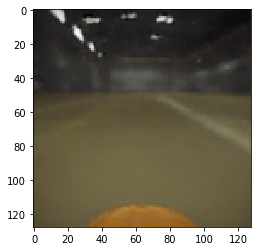

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.17907006 -1.2646047  -0.434815    0.02494761  0.6393279   0.4985076
  0.09018076  0.2397103  -0.21585032  0.10131851 -0.56275064  0.09586304
 -0.24011944  0.2883183   0.5545821   0.0259316  -0.49421862 -0.11538981
  0.07050791  0.12107711 -0.211667    1.257064   -0.20775181 -0.07513566
  0.01724471  0.7060819  -0.7161411   0.30212563  0.18365742 -0.44083148
 -0.21438088 -1.3546559   0.6648988  -0.05567091  0.4668659   1.6586863
 -0.5971306   0.4454112  -0.37830842  0.83385855 -1.1207674  -0.732124
  0.48561013 -0.02721984  0.18836288  1.0869944   0.13160151  0.9130368
 -0.07320778  0.12373187 -0.610176    0.03506994  0.8403401   0.03480871
  0.74482745  2.6277962  -0.43698132  0.3595535  -0.8393374  -0.38542706
 -0.21456999  0.2791621   0.12568219  0.7894567 ]


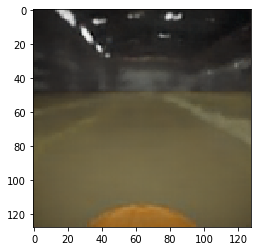

[-0.15271485 -1.0061165   0.03621403  0.14815907  0.43982807  0.17630987
  0.33486354 -0.26046157 -0.31807786  0.15121055 -0.34821075  0.19208336
 -0.1614381   0.36394244 -0.52722824 -0.1018701  -0.26943332  0.55906194
 -0.20538154 -0.46130925 -0.13360569  1.1013398   0.10193844  0.00634243
  0.02333029  0.56204623 -1.3870772   0.33471885 -0.42252076 -0.25333923
  0.18692563 -0.82920617  0.25062668 -0.15974857  0.81521285  0.9697
 -0.59820503  0.82359314 -1.414767    0.8784492  -0.44219628 -0.3938296
 -0.0834301  -0.12377673  0.3570816   1.0066842  -0.08112953  1.0706338
 -0.08767779 -0.60536224 -0.29283535 -0.25761813  0.26449937  0.09271654
  0.49105528  2.2669597  -0.07730621  0.15201257 -0.87073326 -0.2061912
 -0.37903327  0.17792489  0.08313461  0.4069    ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


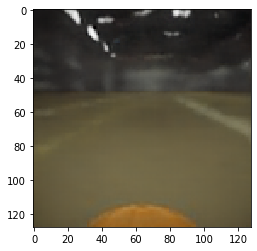

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.2749591  -0.58482766  0.07011355  0.5602697   1.4455464   0.28015673
  0.61599755  0.11919039 -0.20310175  0.60573053 -0.4649951  -0.0153898
  0.36999083  0.5307549  -0.19754064 -0.44674206  0.30332527 -0.17707568
 -0.47087625 -0.4787321   0.18391894  0.18294227  0.3043623   0.13124192
 -0.27467215  0.53072155  0.5562645  -0.0269491  -0.25368303 -0.16766213
  0.22170296 -0.39401996  0.30842397 -0.28877676  0.18506843  0.5987941
 -0.4254827   0.24624434 -1.0701575   0.08314613 -1.1516804  -0.74857527
  0.15502775  0.45904616  0.12110054  0.7017607  -0.07711167 -0.11048226
  0.14836553  0.5758332   0.17555803 -0.29767972 -0.03936647  0.28907487
  0.15362705  3.0178263   0.17044534  0.37781483 -0.6929529   0.13361669
  0.72813123  0.11640592  0.00640028  0.7802781 ]


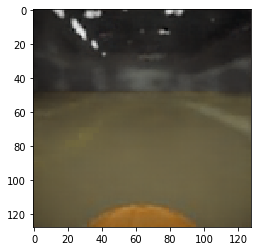

[ 0.18425833 -1.0510145   0.00669921  0.22064447  0.6794077   0.39742923
  0.36642796  0.17393823 -0.02105035  0.46760514 -0.41861302  0.24217743
 -0.13752517  0.49001652 -1.2003487  -0.08145168 -0.675289   -0.37680614
  0.5054622  -0.68729144 -0.19683035  0.5742732   0.5352145   0.05320865
 -0.16226628  0.5949356  -0.6007941  -0.2253184  -0.27235782 -0.0425812
 -0.06915136  0.03698913  0.26991367 -0.17179015  0.50804865  0.18763515
 -0.4911397   0.8633889  -1.6823528   0.46193627 -1.2264639  -0.64186716
  0.36032414 -0.32159436 -0.13040337  0.4858614   0.2228753   0.97960085
 -0.11672614  0.28776693 -0.6598602   0.01553327 -0.19779225 -0.02749146
 -0.05324856  2.3639143   0.29660565  0.63840604 -0.9093025   0.23401314
 -0.13825336 -0.1028423  -0.06866878  0.02707632]


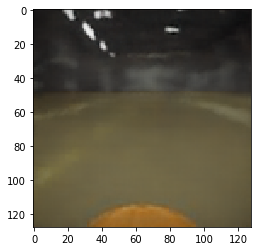

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.21328409  0.43939784 -0.1105683   0.24835497 -0.19846444  0.1327396
 -0.21138905 -0.7347946  -0.04502802  0.28121424  0.08251892  0.12392739
  0.06230108 -0.34430447 -2.2532785  -0.1025628  -0.9480215   0.10072271
  0.07557321 -0.3063912  -0.00294275  0.6153567  -0.08394103  0.11824948
  1.2029413  -0.8283127  -0.8552279  -0.13393117  0.27112788  0.116582
  0.41199696  0.33623934  0.38365668 -0.11901736  1.3819041  -1.5908374
  0.33951762  0.43287492 -1.6909306  -0.569438    0.8091733  -0.6847903
  0.05425967 -0.86095107  0.7153028  -0.19032665  0.26712984  0.7814458
  0.05784795 -0.02448575 -0.6400508  -0.31718054 -0.38378906 -0.14086285
 -1.673653    0.46714875 -0.10204202  0.26494244 -0.19794087 -0.12718552
  0.32021964 -0.09583533 -0.7377791  -0.33720678]


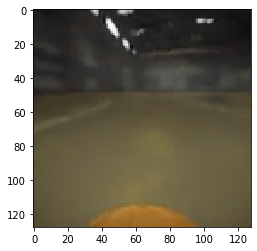

[ 0.08862964  1.2204525   0.09347656  0.11454493  0.07924861  0.32898968
  0.18353394 -0.01764814 -0.06585947  0.01191504 -0.32923597  0.07140961
 -0.01471906 -1.0024902  -1.1768663  -0.05152129 -0.7394885  -1.0116967
  0.04007595 -0.5847103  -0.03302596  1.0089402   0.12619163  0.03300351
  1.0827726  -0.86458766  0.12678778 -0.37672907 -0.36938995 -0.46406692
  0.1293202   0.31746572  0.58305323  0.10674547  0.83540714 -2.0828912
 -0.01572456  0.71955496 -1.4750643  -1.4962604   1.1336362  -0.63069165
  0.14118373 -1.0256723  -0.04070756 -0.6219681   0.51559114 -0.47489807
  0.3530535  -0.5874655   0.2400479  -0.07147962 -0.03059664 -0.05199572
 -1.4522935  -0.12492971 -0.41713545  0.18074518 -0.08978936 -0.01075728
 -0.05021793  0.24289411 -0.0520525  -1.0774415 ]


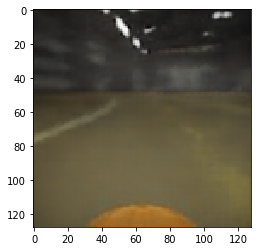

[-0.09419886  0.7793111   0.46676782  0.14031123  0.29871452 -0.19861193
  0.47157767 -0.26350206 -0.10401191 -0.06542548 -0.21004847 -0.11368841
  0.19246829 -0.19735631 -1.1931373  -0.06256792  0.27911854  1.046669
  0.48781607 -0.28513676 -0.27037284  1.2147951  -0.14154503  0.18717493
  0.07749099 -0.64735717 -0.17795794  0.39070153  0.32176727 -0.7882233
  0.02467024  0.53297037  0.03705018  0.02545908  0.9972216  -1.1282672
 -0.2703786   0.41393653 -1.008965   -1.3426206   0.30830395 -0.08634003
 -0.21378927 -0.17087945 -0.21957953 -0.17641975  0.0580303  -0.58029807
  0.76423216 -0.16565791  0.22407141  0.20949818  0.2613779   0.17881674
 -1.2849787   1.9532456  -0.45725715  0.32659805 -0.38500005  0.17220165
  0.5650077   0.47221255 -0.12732625 -0.40577722]


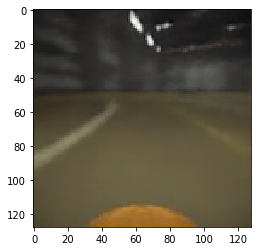

[ 2.12937489e-01  6.75775349e-01  4.47540045e-01  1.43097028e-01
  1.65649891e-01  1.54550850e-01  4.23791766e-01 -1.03413686e-02
 -4.97589260e-03 -4.18379754e-02 -1.82272717e-01  6.96126297e-02
 -2.99767137e-01 -1.99632809e-01 -1.12968409e+00 -1.06910542e-01
  3.31437379e-01  1.34143972e+00  1.22384064e-01 -2.51029342e-01
 -2.86923766e-01  1.25311375e+00 -2.18110442e-01  1.20286383e-01
  5.12058772e-02 -6.04268789e-01 -4.09506917e-01  2.49597818e-01
  3.89391482e-01 -7.76280165e-01 -1.91563532e-01  4.22646165e-01
  6.92664087e-02  1.59059465e-03  9.62832451e-01 -1.01122522e+00
 -3.44250023e-01  4.64710355e-01 -8.88481081e-01 -1.24840999e+00
  2.96615928e-01 -7.45318532e-02 -1.95504159e-01 -1.26425222e-01
 -1.94384515e-01 -5.23540303e-02  1.81967825e-01 -5.16852796e-01
  7.51037657e-01 -1.41861103e-02  1.59006149e-01 -2.22071573e-01
  3.47476095e-01 -4.40267086e-01 -1.17734981e+00  1.96505654e+00
 -4.39523518e-01  3.35830182e-01 -3.16333652e-01  1.62567705e-01
  3.20416540e-01  4.75330

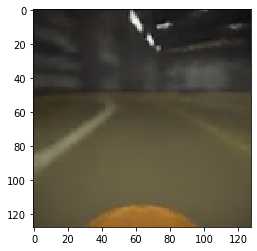

[-0.07936051  0.6700112  -0.1354246   0.5325449  -0.44644615 -0.00689031
 -0.1777713   0.38837424 -0.1845326  -0.05701739  0.5500113  -0.03812686
  0.14610438  0.06461835  1.1844257  -0.08712512  0.57290196  0.26560095
 -0.23586002 -0.4322975  -0.15706818  0.4454509  -0.08899824  0.02246188
  0.4385273   0.6522567   1.0763992  -0.28580594 -0.14831741  0.06959837
  0.46386024 -1.0158203   0.5163447   0.01546666 -0.5137559  -0.21190916
 -0.10204635  0.2723206   0.33066    -0.7423318  -0.27978408 -0.30496764
  0.0669387   0.11729604  0.16321145  0.8350038  -0.420455   -1.4732738
  0.447425   -0.2370206   0.10428962 -0.16276462 -0.09760121  0.19097297
  0.21180062  1.4327786  -0.8392449  -0.28228194  0.31554472 -0.12211753
 -0.24228865  0.380495    0.5875782   0.7579626 ]


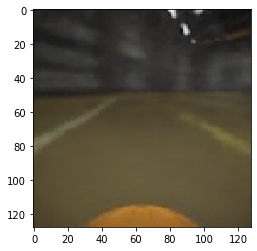

[ 0.18922934  1.1068232  -0.43109947  0.6529817  -0.5265513   0.19377282
 -0.16382214 -0.01986612 -1.1062467  -0.09013118  0.41095093 -0.01699672
  0.01769925 -0.05518697  1.4313445  -0.09601529  0.42352223 -0.06983494
 -0.2990442  -0.23951383 -0.14024821  0.6788292  -0.06225754  0.1719759
  0.5652191   0.33514297  1.0170302  -0.18844278 -0.03060217  0.36664093
  0.16073668 -1.2965204   0.44526932 -0.02572775 -0.8965489  -0.5808867
 -0.7411421   0.36835042  0.5890384  -0.8821509   0.13713692 -0.53430337
 -0.07620213 -0.16441073  0.5240435   1.1750952  -0.16920933 -1.5631812
  0.19578876  0.4174456   0.21449612  0.48404276  0.25962704 -0.16811258
 -0.13916266  0.8577161  -0.8349993  -0.47589087  0.3606356   0.08290857
 -0.07262187  0.37489504  0.38114488  0.57675374]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


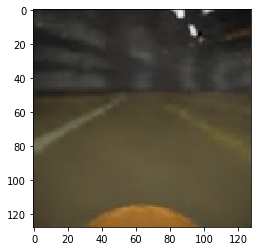

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.23593532  0.79438084 -0.16821133 -0.1049068  -0.7680758  -0.06934775
 -0.24176927 -0.29525188  0.09308109 -0.28879687  0.36332333 -0.20664215
 -0.10121814 -0.00402169 -0.07470461 -0.05160631  0.7903004   0.0139069
  0.00382903 -0.25652426 -0.08819138  0.5956096  -0.47971568 -0.2709758
  0.30729738 -0.03239877  0.3524509   0.22188094 -0.6188501  -0.25014377
 -0.5210901  -0.45528185  0.27934515  0.12038589 -0.07003675 -1.0120027
  0.09461551  0.69492596 -0.14548893 -0.65820354  0.5944926  -0.15927911
  0.2806671  -0.07862993 -0.08740683 -0.07606694  0.84151804 -1.476269
  0.45175576 -0.37257904  0.03852408  0.27053446  0.04423928  0.1646015
 -0.02282033  0.24021487 -0.76866615 -0.39403546  0.22129767 -0.12824489
  0.0286928   0.62911546 -0.42977214 -0.5698704 ]


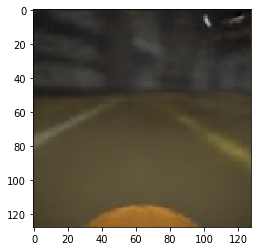

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 0.2957011   0.76628774 -0.35659167  0.03066663 -0.78261364  0.02739079
 -0.16331008 -0.09369496 -0.19301578 -0.32638547  0.56445074 -0.46476322
 -0.5063005   0.10843254  0.18029799 -0.13418832  0.67596996  0.02691253
  0.05326569 -0.47854057 -0.1767993   0.5918732   0.27890667 -0.24889843
  0.4052461   0.29318002  0.32485333 -0.178386   -0.71899307 -0.41371164
  0.94805074 -0.51357687  0.31957257  0.22155915 -0.30245343 -0.9828391
 -0.03301124  0.6941937  -0.24499126 -0.70341146  0.3865985  -0.30938962
  0.6175857  -0.12602931 -0.04045367  0.02011987 -0.6189803  -1.3042194
  0.42638376  0.06345734 -0.23761494  0.0631168  -0.06139092 -0.29547295
 -0.12102969  0.18615666 -0.74951655 -0.457025    0.14029264  0.04187509
 -0.00773439  0.60945827 -0.1960209  -0.785483  ]


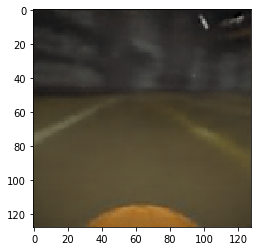

[ 0.1902656   0.80203146 -0.33799252  0.11747992 -0.10403104 -0.01717707
  0.1663837  -0.30790865 -0.09602361 -0.06746992  0.39703423  0.09600664
  0.53136235 -0.20491023  0.29296657  0.10582735  0.6283562   0.02770736
  0.18736273 -0.45774397 -0.07322324  0.30084467 -0.38156974  0.01159805
  0.40207586  0.00250848  0.36102548  0.05383525  0.7069183  -0.53650826
 -0.1518013  -0.5615236   0.5621988   0.03753328 -0.2021394  -1.1876155
 -0.02119725  0.5354644  -0.30342883 -0.69973004  0.408981   -0.24326552
  0.21038774  0.07527345 -0.06299604 -0.06103824 -0.48178464 -1.6292949
  0.39784643 -0.3210708   0.31583944 -0.44470438  0.3129733  -0.5475259
 -0.11135198  0.379498   -0.505443   -0.165682   -0.04877313  0.10820941
 -0.15709355  0.6477108   0.15421355 -0.7273576 ]


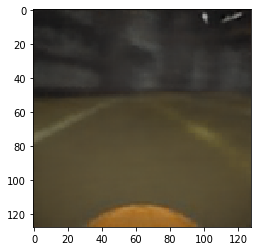

[ 0.20643464  0.7333701  -0.24534777 -0.07313404 -0.2985777   0.6407831
  0.18261646  0.71348923  0.25463733 -0.2500177   0.5562446  -0.3366999
  0.21969014 -0.3789723   0.12280426  0.06807965  0.45695662 -0.1015298
  0.03433763 -0.2538603   0.00947528  0.30839473  0.55837536 -0.0382809
  0.3024944   0.02914997  0.345382    0.09412807  0.21857503 -0.35526443
  0.21105936 -0.43518546  0.31934568  0.02395877 -0.09785002 -1.1776253
  0.15103893  0.7204721  -0.22194847 -0.5467572   0.26943657 -0.107025
  0.09274819  0.05131759 -0.41315615 -0.21571863 -0.22016484 -1.6297916
  0.4128126   0.35530296  0.37524533 -0.87884146  0.24379359  0.35863936
 -0.04339319  0.48300806 -0.41238847  0.09552529 -0.03712536 -0.00802317
  0.26742935  0.58242536  0.04185244 -0.5531095 ]


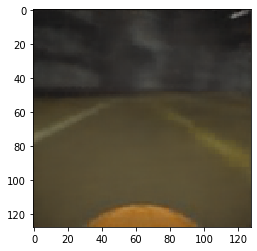

[-0.21249485  0.1454752  -0.2665672  -0.2954525  -1.3409925   0.16130853
 -0.43306777  0.06539881  0.24754122 -0.14363405  0.43669897 -0.0819634
  0.20028228 -0.05492225 -0.09133563  0.4862564  -0.05031964  0.58465105
 -0.27535066 -0.4074521  -0.17191108 -0.00910247  0.6591923  -0.45725977
  0.97576463  0.41268915 -1.3834807   0.3713252  -0.05120115  0.06647468
  0.801332   -0.7051933   0.45562166 -0.05534134 -0.16886103 -0.8138796
 -0.3901814   1.2616274  -1.0095944   0.20773314  0.2201782  -0.13943803
  0.437738    0.02473493  0.0906634   0.22170353  0.28645778 -0.66633314
  0.18272012  0.50613    -0.989811   -0.45284623  0.05957329  0.09081827
 -0.19161013  0.7317682   0.36571762 -0.33341953 -0.15112562 -0.13524218
  0.09643682  0.46578276  0.5111172  -1.2725104 ]


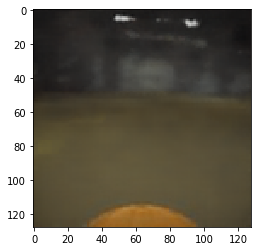

[ 1.1314304  -0.74172324 -0.18313992  0.10324729 -0.46592066  0.29109004
 -0.25164238  0.05252692 -0.76614565  0.5934603   1.1063857  -0.06728159
  0.354751    0.59608227 -0.609734    0.17731164  0.2222047   1.2398804
 -0.13404958 -0.7966353   0.21215978 -0.12112799  0.15561676 -0.06645453
  0.12421449  0.35729927 -0.6890004  -0.1440574  -0.4885248   1.0725062
 -0.31499124 -1.161045   -0.12332691 -0.4275439  -0.6384079  -1.0816817
 -0.54384726  0.6679271  -0.08647613  0.53552043 -0.7046095   0.5218076
 -0.46886688  0.4529941  -0.274448    0.72132546 -0.2186693  -0.3184387
 -0.6170709   0.3108379  -0.2400935   0.24581851 -0.4590821  -0.15056263
  0.21922673  1.1782906   0.4170381   0.3072569  -0.5708449   0.22345163
 -0.1010863   0.52501804  0.0139621  -0.0725657 ]


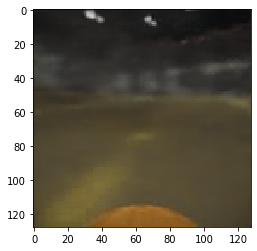

[ 0.250728   -0.78518784 -0.05973513 -0.20850758 -0.7668366   0.2252991
 -0.2730698   0.2199506  -0.29619008  0.09056508  0.44743252  0.7782521
 -0.76373315 -0.1345248  -0.534949    0.3259344   0.618025    1.548581
 -0.08571042 -0.09672122 -0.02466511 -0.08868816 -0.03816584 -0.29661283
  0.03807271 -0.07768354 -0.54831636 -0.26590475 -0.14126039  0.5172821
  0.51337886 -0.8215314   0.03024199 -0.20523821 -0.09071474 -1.0154834
  0.02646938  0.59198993  0.16124119  0.80805683 -0.84651506  0.71667546
 -0.51480937  0.85009754 -0.7845842   0.64009076 -0.50214916 -0.6399293
 -0.15897158 -0.1838277  -0.04949584 -0.09423652  0.18664108  0.02548169
  0.78924066  1.2746812   0.33324957  0.4767653   0.12518972 -0.29243892
 -0.24727273  0.35144508 -0.03213365  0.41179797]


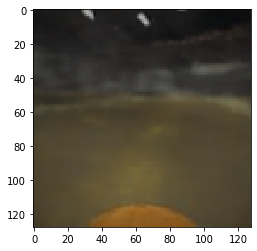

[-1.6001180e-02  1.2984775e+00 -5.7353967e-01  8.8166311e-02
 -4.4336036e-01  1.5532835e-01  3.7628345e-02 -1.4342768e-01
  4.0718454e-01 -3.3273363e-01  3.2198554e-01  1.1412525e-01
 -6.9770324e-01  3.4942725e-01  5.1221275e-01 -1.0219907e-01
  3.5072508e-01 -7.8178442e-01  2.8063187e-01  2.7150565e-01
 -2.6500118e-01  8.5923994e-01 -1.3415399e-01  2.4323608e-01
  5.2264118e-01  2.9394407e-02  7.0659262e-01 -1.0315903e-01
 -5.0714350e-01 -6.2078526e-03 -3.3298916e-01 -6.9613940e-01
  1.9000563e-01  1.0994375e-03 -4.1019204e-01 -9.0385407e-01
 -3.6622000e-01  4.3487579e-01  3.3559150e-01 -9.2701697e-01
  4.2202413e-01 -9.0638411e-01  2.0418692e-02 -2.2019619e-01
  3.8170958e-01  2.3056480e-01  3.7175101e-01 -1.4294829e+00
  2.6782277e-01  5.4333225e-02 -1.9323672e-01  3.6495149e-01
  2.4672651e-01 -1.4995782e-01 -6.9916409e-01  5.8455682e-01
 -1.0726297e+00 -3.7986267e-01  7.0557520e-02 -2.1685883e-03
 -1.6191505e-02  5.3292704e-01 -3.9141023e-01 -1.1583077e-01]


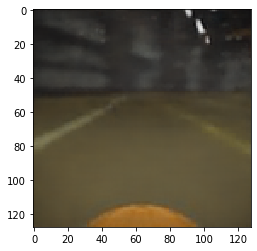

[-0.25237992 -0.9380965  -0.19243066  0.04201791 -0.36932015 -0.767196
 -0.48890564 -0.03386596 -0.28046954 -0.28054345  0.31173688  0.11509003
  0.20433949 -0.27144644 -1.6297524  -0.03769916 -0.28079686 -0.9847734
  0.325036    0.59747654  0.01097322 -0.50880176  0.07085959  0.06285313
  0.3316937   0.46449938  0.6633256   0.22877774  1.2906406   0.19680305
  0.05232203 -0.55675596 -0.07784979  0.13829502  0.88641006 -0.2843903
  1.5296695  -0.02119797 -0.06347835  1.2689257  -1.2339944  -0.00661474
 -0.11351174  0.38555768 -0.83086616 -0.36000702  0.7008687  -0.10127384
 -0.3411603   0.01523054 -0.45775044  0.04297987 -0.6126171  -0.4129774
  1.1346798   1.3884875  -0.00633239  0.70206493  0.1666561  -0.4586489
 -0.33699673 -0.02426566 -0.54679406  1.3154416 ]


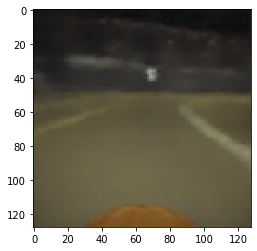

[-0.13148484 -0.41297176 -0.36593974 -0.20734295 -0.84413254  0.06763905
 -0.58548117  0.10504753 -0.446257   -0.23697974  0.35550213 -0.59476864
  0.08107628  0.01896324 -1.369495   -0.27577123 -0.25759912 -1.6910875
 -0.694327    0.9100396   0.07539799 -0.59735936  0.2778555   0.06491667
  0.33454233  0.46730408  0.8896082   0.6669409  -0.05193449  0.5142484
  0.31619757 -0.41952643 -0.26448703  0.24030842  0.645519   -0.26437557
  1.5073161   0.19177052 -0.00972095  1.0350189  -0.8902887  -0.05185539
 -0.17427063  0.28041106 -0.86021316 -0.52878314  0.13572589 -0.51332
 -0.3600891   0.25949383 -0.48589802  0.82790065 -0.6836957   0.14461443
  1.1619474   1.1848013   0.01113974  0.48226267  0.1345396  -0.49893966
 -0.64559793  0.15566725 -0.33687684  1.3093607 ]


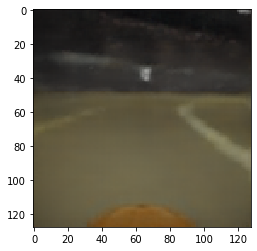

[ 0.10376632  0.18970552 -0.63487244 -0.51301986 -0.8577069   0.04027754
 -0.42251533  0.01046389  0.11645386 -0.834513    0.27437723  0.20241009
  0.28240407 -0.3358809  -0.32894474  0.05029283 -0.38821614 -2.768262
  0.7321514   0.42191812  0.04646751 -0.38996026 -0.15886918 -0.5696188
  0.26721025  0.8157148   1.9250457   0.16249394  0.4692883   0.10827446
 -0.57325363  0.47150922  0.0617708   0.17266153  0.2467669  -0.00626884
  1.2098751   0.1543385   0.1718411   0.5813799  -1.2710937  -0.02040547
 -0.22398376 -0.15579228 -1.0357738  -0.11768842  0.65742797 -0.35849518
 -0.35537523  0.19130361 -0.7104946   0.85805434 -0.21329427 -0.03969345
  1.2001724   0.91703314  0.78891814  0.27386683  0.5182502  -0.23323935
 -0.20348555 -0.01589523  0.04340343  1.5341803 ]


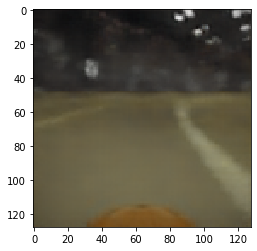

In [12]:
for img, z in zip(*[X_reco, Z]):
    print(torch2numpy(z))
    plt.imshow(torch2numpy(img.permute(1, 2, 0)))
    plt.show()